# Homework #2: Music Auto Tagging (Multi-Label Classification and Metric Learning Approach)


Music auto-tagging is an important task that can be used in many musical applications such as music search or recommender systems. 

Two central methods for representation learning include deep metric learning and classification, both having the same goal of learning a representation that can generalize well across tasks.

Your mission is to build your own Neural Network model to represent audio signal. Specifically, the goals of this homework are as follows:

* Experiencing the whole pipeline of deep learning based system: data preparation, feature extraction, model training and evaluation
* Getting familiar with the Neural Network architectures for music representation
* Using Pytorch in practice

# Getting Ready

## Preparing The Dataset
We use the [magnatagatune](https://mirg.city.ac.uk/codeapps/the-magnatagatune-dataset) dataset which has been the most widely used in the music tagging task.  The MagnaTagATune dataset consists of 25k music
clips from 6,622 unique songs.

The dataset contains 30-second audio files including 189 different tags
For this homework, we are going to use a magnatagatune with 8-second audio and only 50 genres.

We use subset of magnatagatune dataset (9074 samples x 8 sec).

To make your life easier, place them in a directory as below:

```
├── annotations_final.csv
├── waveform
  ├── 1
  ├── ...
  └── d
```

In [3]:
# Download the dataset (3GB)
# %%capture
!wget http://mi.soi.city.ac.uk/datasets/magnatagatune/annotations_final.csv
!gdown --id 1f_kUF9nTLFI0pJaZxm6YNt4t_J6-Q-dg
!tar -xvf gct634.tar.gz

--2021-10-12 17:23:48--  http://mi.soi.city.ac.uk/datasets/magnatagatune/annotations_final.csv
Resolving mi.soi.city.ac.uk (mi.soi.city.ac.uk)... 138.40.249.126
Connecting to mi.soi.city.ac.uk (mi.soi.city.ac.uk)|138.40.249.126|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mirg.city.ac.uk/datasets/magnatagatune/annotations_final.csv [following]
--2021-10-12 17:23:49--  https://mirg.city.ac.uk/datasets/magnatagatune/annotations_final.csv
Resolving mirg.city.ac.uk (mirg.city.ac.uk)... 138.40.249.131
Connecting to mirg.city.ac.uk (mirg.city.ac.uk)|138.40.249.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21517373 (21M) [text/csv]
Saving to: ‘annotations_final.csv.1’

annotations_final.c 100%[===================>]  20.52M  1.11MB/s    in 24s     

2021-10-12 17:24:14 (872 KB/s) - ‘annotations_final.csv.1’ saved [21517373/21517373]

Downloading...
From: https://drive.google.com/uc?id=1f_kUF9nTLFI0pJaZxm6YNt4t

x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-11-psalm_51_tilge_hochster_meine_sunden_viii_verse_9-59-88.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-06-in_the_stars_whirling-262-291.npy
x waveform/0/voices_of_music-an_evening_with_bach-02-schlummert_ein_bwv_82-175-204.npy
x waveform/0/voices_of_music-an_evening_with_bach-15-passacaglia_mein_freund_ist_mein_j_c__bach-436-465.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-04-quoniam_tu_solus__allegro-117-146.npy
x waveform/0/the_bots-truth-03-this_thing_called_happiness-146-175.npy
x waveform/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-07-recercar_7_steel_string_guitar-30-59.npy
x waveform/0/jag-juke_joint_boogie-02-lay_down_your_plow-0-29.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-17-benedictus__moderatoallegro-262-291.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-11-agnus_dei__adagio-59-88.npy
x waveform/0/williamson-a_few_things_to_he

x waveform/0/barbara_leoni-human_needs-06-haunted-146-175.npy
x waveform/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-17-prelude_and_fugue_no__21_in_bflat_major_bwv_890_praeludium-0-29.npy
x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-10-psalm_51_tilge_hochster_meine_sunden_vii_verse_8-175-204.npy
x waveform/0/the_bots-truth-11-it_just_feels_right-0-29.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-06-in_the_stars_whirling-117-146.npy
x waveform/0/beth_quist-silver-04-grace-59-88.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-17-benedictus__moderatoallegro-88-117.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-08-whats_on_the_ceiling_beats_whats_on_tv-146-175.npy
x waveform/0/american_bach_soloists-j_s__bach__cantatas_volume_v-17-nun_komm_der_heiden_heiland_bwv_61_v_aria__offne_dich_mein_ganzes_herze-0-29.npy
x waveform/0/the_bots-truth-10-give_it_up-175-204.npy
x waveform/0/american_bach_soloists-j_s__b

x waveform/0/the_bots-truth-11-it_just_feels_right-30-59.npy
x waveform/0/apa_ya-apa_ya-02-egyptian_wedding-175-204.npy
x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-15-psalm_51_tilge_hochster_meine_sunden_xii_largo_verses_17_and_18-117-146.npy
x waveform/0/beth_quist-silver-02-om_asatoma_sad_gamaya-262-291.npy
x waveform/0/chris_harvey-the_white_sail-07-elation_sedation-320-349.npy
x waveform/0/satori-sounds_for_meditation-05-meditation_5-262-291.npy
x waveform/0/satori-sounds_for_meditation-01-meditation_1-146-175.npy
x waveform/0/william_brooks-bitter_circus-04-ole_soledad-117-146.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-06-in_the_stars_whirling-233-262.npy
x waveform/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-20-prelude_and_fugue_no__22_in_bflat_minor_bwv_891_fuga-59-88.npy
x waveform/0/satori-sounds_for_meditation-04-meditation_4-436-465.npy
x waveform/0/ensemble_vermillian-stolen_jewels-10-biber_sonata_vi_1681_v__adagioallegro

x waveform/0/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-0-29.npy
x waveform/0/beth_quist-silver-11-planet-523-552.npy
x waveform/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-05-recercar_5_steel_string_guitar-0-29.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-04-time_youll_never_get_back-117-146.npy
x waveform/0/rocket_city_riot-last_of_the_pleasure_seekers-11-lost_then_found-117-146.npy
x waveform/0/ammonite-reconnection-03-liquid_sun-291-320.npy
x waveform/0/barbara_leoni-human_needs-03-another_time-175-204.npy
x waveform/0/ensemble_vermillian-stolen_jewels-07-biber_sonata_vi_1681_passacagli-88-117.npy
x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-01-concerto_in_a_minor_for_four_harpsichords_bwv_1065_i_allegro-59-88.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-18-agnus_dei__adagio-59-88.npy
x waveform/0/american_bach_soloi

x waveform/0/ensemble_vermillian-stolen_jewels-16-boddecker_sonata_sopra_la_monica-233-262.npy
x waveform/0/satori-sounds_for_meditation-02-meditation_2-88-117.npy
x waveform/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-02-recercar_2_steel_string_guitar-0-29.npy
x waveform/0/chris_harvey-the_white_sail-11-the_white_sail-494-523.npy
x waveform/0/william_brooks-bitter_circus-03-seven_promises-88-117.npy
x waveform/0/beth_quist-silver-10-q_song-494-523.npy
x waveform/0/apa_ya-apa_ya-11-i_cordia-30-59.npy
x waveform/0/voices_of_music-an_evening_with_bach-08-schlafe_mein_leibster_bwv_213-88-117.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-04-just_like_moths-233-262.npy
x waveform/0/the_bots-truth-06-dont_funk_with_the_funk_junkie-146-175.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-05-credo__allegro_con_spirito-59-88.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-07-i_cry_you_all_the_time-175-204.npy
x waveform/0/williamson-a_few_things_to_hear_befor

x waveform/0/solace-iman-02-iman-320-349.npy
x waveform/0/apa_ya-apa_ya-02-egyptian_wedding-30-59.npy
x waveform/0/american_bach_soloists-j_s__bach__cantatas_volume_v-03-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_iii_recitative_and_litany__mein_gott_hier_wird_mein_herze_sein-146-175.npy
x waveform/0/solace-iman-10-saalik_2-349-378.npy
x waveform/0/voices_of_music-an_evening_with_bach-15-passacaglia_mein_freund_ist_mein_j_c__bach-523-552.npy
x waveform/0/ammonite-reconnection-02-heaven-262-291.npy
x waveform/0/apa_ya-apa_ya-09-india_electrique-117-146.npy
x waveform/0/rocket_city_riot-middle_age_suicide-03-no_end_in_sight-146-175.npy
x waveform/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-07-prelude_and_fugue_no__16_in_g_minor_bwv_885_praeludium-88-117.npy
x waveform/0/william_brooks-bitter_circus-03-seven_promises-0-29.npy
x waveform/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavier-17-prelude_and_fugue_no__21_in_bflat_major_bwv_890_praeludium-30-59.npy
x wavefor

x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-09-and_then_its_all_gone-291-320.npy
x waveform/0/rocket_city_riot-last_of_the_pleasure_seekers-05-all_the_way_down-146-175.npy
x waveform/0/solace-iman-02-iman-146-175.npy
x waveform/0/william_brooks-bitter_circus-09-is_there_anybody_there-0-29.npy
x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-13-psalm_51_tilge_hochster_meine_sunden_x_andante_verses_11_through_15-291-320.npy
x waveform/0/rocket_city_riot-middle_age_suicide-03-no_end_in_sight-117-146.npy
x waveform/0/ammonite-reconnection-11-touch-262-291.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-02-rubber-175-204.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-05-an_hour_in-117-146.npy
x waveform/0/william_brooks-bitter_circus-04-ole_soledad-88-117.npy
x waveform/0/american_bach_soloists-joseph_haydn__masses-15-credo__allegroadagioallegro-88-117.npy
x waveform/0/barbara_leoni-human_nee

x waveform/0/jeffrey_luck_lucas-what_we_whisper-09-sometimes_sometimes-0-29.npy
x waveform/0/jag-juke_joint_boogie-11-slow_blues-59-88.npy
x waveform/0/ammonite-reconnection-04-restrained_mind-204-233.npy
x waveform/0/paul_berget-the_siena_manuscript_on_steel_string_guitar-11-recercar_11_steel_string_guitar-59-88.npy
x waveform/0/chris_harvey-the_white_sail-04-secrets_from_the_screen-233-262.npy
x waveform/0/american_bach_soloists-j_s__bach__transcriptions_of_italian_music-07-psalm_51_tilge_hochster_meine_sunden_iv_andante_verse_4-59-88.npy
x waveform/0/chris_harvey-the_white_sail-08-plasmate-175-204.npy
x waveform/0/chris_harvey-the_white_sail-06-liber_null__part_2-204-233.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-08-know_my_name-146-175.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-09-and_then_its_all_gone-30-59.npy
x waveform/0/apa_ya-apa_ya-10-funky_funky-30-59.npy
x waveform/0/chris_harvey-the_white_sail-01-biomorph-0-29.npy
x waveform/0/beth_qui

x waveform/0/jag-juke_joint_boogie-05-im_troubled-117-146.npy
x waveform/0/beth_quist-silver-05-blue_planet-117-146.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-204-233.npy
x waveform/0/ensemble_vermillian-stolen_jewels-05-buxtehude_sonata_iv_op__i_lentovivace-30-59.npy
x waveform/0/rocket_city_riot-middle_age_suicide-07-all_my_pain-175-204.npy
x waveform/0/ammonite-reconnection-07-angel_hold_on___-117-146.npy
x waveform/0/voices_of_music-an_evening_with_bach-05-giga_bwv_1004-117-146.npy
x waveform/0/william_brooks-bitter_circus-09-is_there_anybody_there-233-262.npy
x waveform/0/voices_of_music-an_evening_with_bach-04-ich_folge_dir_gleichfalls_bwv_245-59-88.npy
x waveform/0/satori-sounds_for_meditation-01-meditation_1-262-291.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-08-whats_on_the_ceiling_beats_whats_on_tv-233-262.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-06-were_all_boned-204-233.npy
x waveform/0/vo

x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-10-a-30-59.npy
x waveform/0/satori-sounds_for_meditation-04-meditation_4-262-291.npy
x waveform/0/chris_harvey-the_white_sail-03-paris-146-175.npy
x waveform/0/the_bots-truth-11-it_just_feels_right-146-175.npy
x waveform/0/voices_of_music-an_evening_with_bach-06-schafe_konnen_sicher_weiden_bwv_208-117-146.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-01-you_knew_it_well-117-146.npy
x waveform/0/beth_quist-silver-04-grace-0-29.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-04-time_youll_never_get_back-175-204.npy
x waveform/0/rocket_city_riot-middle_age_suicide-03-no_end_in_sight-59-88.npy
x waveform/0/rocket_city_riot-last_of_the_pleasure_seekers-11-lost_then_found-30-59.npy
x waveform/0/the_bots-truth-09-give_me_some_truth-88-117.npy
x waveform/0/ensemble_vermillian-stolen_jewels-03-rosenmuller_sonata_teraz_a_2_presto-30-59.npy
x waveform/0/daniel_ben_pienaar-book_2_cd2_welltempered_clavie

x waveform/0/rocket_city_riot-last_of_the_pleasure_seekers-12-cut_me_out-0-29.npy
x waveform/0/ammonite-reconnection-08-broken-30-59.npy
x waveform/0/william_brooks-bitter_circus-06-a_different_state_of_mind-175-204.npy
x waveform/0/jeffrey_luck_lucas-what_we_whisper-03-the_pills-59-88.npy
x waveform/0/satori-sounds_for_meditation-05-meditation_5-291-320.npy
x waveform/0/ensemble_vermillian-stolen_jewels-19-buxtehude_sonata_iii_op__i_allegro-59-88.npy
x waveform/0/rocket_city_riot-middle_age_suicide-01-all_i_got-88-117.npy
x waveform/0/beth_quist-silver-02-om_asatoma_sad_gamaya-117-146.npy
x waveform/0/williamson-a_few_things_to_hear_before_we_all_blow_up-01-2_percent_er-88-117.npy
x waveform/0/american_bach_soloists-j_s__bach__cantatas_volume_v-06-weinen_klagen_sorgen_zagen_bwv_12_i_sinfonia-117-146.npy
x waveform/0/ammonite-reconnection-07-angel_hold_on___-233-262.npy
x waveform/0/barbara_leoni-human_needs-06-haunted-117-146.npy
x waveform/0/voices_of_music-an_evening_with_bach-06-sc

x waveform/2/jami_sieber-lush_mechanique-05-secret_heat-233-262.npy
x waveform/2/burnshee_thornside-blues_and_misc-01-happy_blues-0-29.npy
x waveform/2/magnatune_compilation-electronica-09-wicked_allstars_possible_new_house-175-204.npy
x waveform/2/aba_structure-tektonik_illusion-03-pipe-320-349.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-17-fifth_suite___la_boisson_forqueray-117-146.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-14-fifth_suite__la_rameau_forqueray-117-146.npy
x waveform/2/mrdc-timecode-05-timecode-204-233.npy
x waveform/2/aba_structure-tektonik_illusion-02-illusion-378-407.npy
x waveform/2/solace-ahsas-08-forsaken_curcuna_108-146-175.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-08-fourth_suite__la_marella_forqueray-117-146.npy
x waveform/2/shira_kammen-the_almanac-15-ilkley_moor-117-146.npy
x waveform/2/roots_of_rebell

x waveform/2/magnatune_remixed-ridin_the_faders_2-11-we_are_not_evil_featuring_clarance_boddyker__lo_tag_blanco-0-29.npy
x waveform/2/version-versions-01-double_trust-320-349.npy
x waveform/2/indidginus-as_above_so_below-04-jang-262-291.npy
x waveform/2/zephyrus-angelus-09-vox_clamantis_in_deserto_giaches_de_wert-146-175.npy
x waveform/2/anup-embrace-06-life_glides-233-262.npy
x waveform/2/indidginus-seismic-03-master_of_masters-233-262.npy
x waveform/2/ensemble_mirable-conversations_galantes-13-sonata_ii_in_b_minor_ariagratioso_altro-88-117.npy
x waveform/2/magnatune_remixed-ridin_the_faders_2-08-im_the_i_995__fourstones-59-88.npy
x waveform/2/shira_kammen-the_almanac-12-a_globo_veteeri-262-291.npy
x waveform/2/jesse_manno-sea_spirits-15-receiving_the_gift-30-59.npy
x waveform/2/version-versions-08-love_redux-175-204.npy
x waveform/2/jesse_manno-sea_spirits-15-receiving_the_gift-175-204.npy
x waveform/2/ensemble_mirable-conversations_galantes-10-sonata_v_in_f_major_andante-59-88.npy
x

x waveform/2/magnatune_compilation-electronica-05-monoide_first_love-291-320.npy
x waveform/2/jamie_janover-evolutions-12-harbor_island-88-117.npy
x waveform/2/jesse_manno-sea_spirits-12-begin_again-59-88.npy
x waveform/2/ensemble_mirable-conversations_galantes-06-sonata_iv_in_c_major_ariagratioso_altro_piu_allegro-233-262.npy
x waveform/2/jamie_janover-evolutions-10-evolutions-262-291.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-15-fifth_suite__la_guignon_forqueray-88-117.npy
x waveform/2/mrdc-timecode-03-dna-59-88.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-04-deuxieme_concert__la_laborde_rameau-175-204.npy
x waveform/2/jami_sieber-lush_mechanique-09-dancing_at_the_temple_gate-465-494.npy
x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-08-the_old_georgian_chant-59-88.npy
x waveform/2/magnatune_remixed-ridin_the_faders_2-01-shining_star_games_az_egan

x waveform/2/jami_sieber-lush_mechanique-03-all_she_can_carry-204-233.npy
x waveform/2/antiguru-fall_submissions-08-peering-59-88.npy
x waveform/2/burnshee_thornside-blues_and_misc-09-i_cant_say_no-117-146.npy
x waveform/2/jamie_janover-evolutions-09-pentagon_in_square-59-88.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-17-suite_v_in_do_minore__sarabande-59-88.npy
x waveform/2/shira_kammen-the_almanac-15-ilkley_moor-88-117.npy
x waveform/2/jami_sieber-lush_mechanique-05-secret_heat-146-175.npy
x waveform/2/duo_chambure-vihuela_duets_of_valderrabano-07-payne_trabel_jean_mouton-88-117.npy
x waveform/2/indidginus-as_above_so_below-05-omega_3-262-291.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-11-suite_iv_in_mi_bemolle_maggiore__bourree_i_e_ii-204-233.npy
x waveform/2/zephyrus-angelus-02-ave_maria___virgo_serena_josquin_des_prez-59-88.npy
x waveform/2/paul_avgerinos-gnosis-04-know_thyself-59-88.npy
x waveform/2/antiguru-fall_submissions-07-rectify-146-175.npy
x waveform

x waveform/2/jamie_janover-evolutions-06-the_hideous_realms_of_neptune-117-146.npy
x waveform/2/version-versions-02-universal_humans-30-59.npy
x waveform/2/ensemble_mirable-conversations_galantes-13-sonata_ii_in_b_minor_ariagratioso_altro-117-146.npy
x waveform/2/solace-ahsas-09-opaque_drum_solo-59-88.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-10-suite_iv_in_mi_bemolle_maggiore__sarabande-117-146.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-12-suite_iv_in_mi_bemolle_maggiore__gigue-117-146.npy
x waveform/2/roots_of_rebellion-surfacing-02-declaration-88-117.npy
x waveform/2/ensemble_mirable-conversations_galantes-14-sonata_ii_in_b_minor_allegro-0-29.npy
x waveform/2/magnatune_remixed-ridin_the_faders_2-12-there_is_no_brad_sucks__fourstones-0-29.npy
x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-06-open_to_me_the_doors_of_repentance_byzantine_chant_bulgarian_tradition-117-146.npy
x waveform/2/claire_fitch-ambiencellist-03-lunarshee

x waveform/2/indidginus-as_above_so_below-07-machu-117-146.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-04-deuxieme_concert__la_laborde_rameau-233-262.npy
x waveform/2/mrdc-timecode-01-lust-30-59.npy
x waveform/2/drop_trio-big_dipper-04-wallawalla-30-59.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-13-fourth_suite__la_latour_forqueray-0-29.npy
x waveform/2/duo_chambure-vihuela_duets_of_valderrabano-13-jubilate_deo_cristobal_de_morales-30-59.npy
x waveform/2/anup-embrace-03-jingle_bells-175-204.npy
x waveform/2/anup-embrace-01-sweet_dissonance-59-88.npy
x waveform/2/saros-soundscapes-03-symphony_of_force-204-233.npy
x waveform/2/jami_sieber-lush_mechanique-04-your_leaving-146-175.npy
x waveform/2/duo_chambure-vihuela_duets_of_valderrabano-15-et_in_spiritum_sanctum_missa_mille_regrets_cristobal_de_morales-59-88.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forquer

x waveform/2/aba_structure-tektonik_illusion-01-terra-320-349.npy
x waveform/2/ensemble_mirable-conversations_galantes-08-sonata_v_in_f_major_allegromoderato-262-291.npy
x waveform/2/anup-embrace-01-sweet_dissonance-0-29.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-17-suite_v_in_do_minore__sarabande-146-175.npy
x waveform/2/mrdc-timecode-05-timecode-146-175.npy
x waveform/2/duo_chambure-vihuela_duets_of_valderrabano-01-andreas_christi_sancte_andrea_cristobal_de_morales-88-117.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-15-suite_v_in_do_minore__allemande-146-175.npy
x waveform/2/magnatune_compilation-electronica-07-antiguru_blue_line-233-262.npy
x waveform/2/stellamara-star_of_the_sea-08-karuna-59-88.npy
x waveform/2/paul_avgerinos-gnosis-04-know_thyself-175-204.npy
x waveform/2/burnshee_thornside-blues_and_misc-02-you_cant_dance-30-59.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-18-fifth_suite__la_sylva_forqueray-8

x waveform/2/solace-ahsas-05-kronos_84_debke_wahda_tawila-349-378.npy
x waveform/2/jami_sieber-lush_mechanique-02-daybreak-146-175.npy
x waveform/2/claire_fitch-ambiencellist-06-underwater-0-29.npy
x waveform/2/roots_of_rebellion-surfacing-03-just_like_before-88-117.npy
x waveform/2/ensemble_mirable-conversations_galantes-01-sonata_iii_in_d_minor_allegromoderato-175-204.npy
x waveform/2/aba_structure-tektonik_illusion-02-illusion-639-668.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-10-suite_iv_in_mi_bemolle_maggiore__sarabande-30-59.npy
x waveform/2/paul_avgerinos-gnosis-04-know_thyself-30-59.npy
x waveform/2/jesse_manno-sea_spirits-12-begin_again-233-262.npy
x waveform/2/jami_sieber-lush_mechanique-05-secret_heat-30-59.npy
x waveform/2/drop_trio-big_dipper-10-abbey_rhodes-117-146.npy
x waveform/2/jamie_janover-evolutions-10-evolutions-349-378.npy
x waveform/2/roots_of_rebellion-surfacing-02-declaration-30-59.npy
x waveform/2/paul_avgerinos-gnosis-06-gnosis-204-233.npy
x wave

x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-04-cherubic_hymn_georgian_chant-117-146.npy
x waveform/2/version-versions-08-love_redux-117-146.npy
x waveform/2/shira_kammen-the_almanac-08-ce_moys_de_may-30-59.npy
x waveform/2/shira_kammen-the_almanac-01-the_oar_wheel-175-204.npy
x waveform/2/drop_trio-big_dipper-02-second_first-146-175.npy
x waveform/2/drop_trio-big_dipper-10-abbey_rhodes-30-59.npy
x waveform/2/version-versions-10-gardens_of_utopia-88-117.npy
x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-03-to_thee_o_theotokos_bulgarian_chant-146-175.npy
x waveform/2/version-versions-07-american_rasta-291-320.npy
x waveform/2/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-0-29.npy
x waveform/2/claire_fitch-ambiencellist-09-still_reaction-146-175.npy
x waveform/2/stellamara-star_of_the_sea-06-immrama-320-349.npy
x waveform/2/jamie_janover-evolutions-02-moab-436-465.npy
x waveform/2/jesse_manno-sea_spirits-10

x waveform/2/zephyrus-angelus-02-ave_maria___virgo_serena_josquin_des_prez-262-291.npy
x waveform/2/indidginus-seismic-02-catatonic_convertor-204-233.npy
x waveform/2/shira_kammen-the_almanac-09-le_lai_de_la_rose-262-291.npy
x waveform/2/roots_of_rebellion-surfacing-02-declaration-59-88.npy
x waveform/2/indidginus-seismic-04-extinction-291-320.npy
x waveform/2/indidginus-as_above_so_below-06-champa-30-59.npy
x waveform/2/version-versions-02-universal_humans-233-262.npy
x waveform/2/mrdc-timecode-02-dopamine-30-59.npy
x waveform/2/version-versions-03-solaire-88-117.npy
x waveform/2/aba_structure-tektonik_illusion-03-pipe-349-378.npy
x waveform/2/drop_trio-big_dipper-01-wreck_of_the_zephyr-117-146.npy
x waveform/2/shira_kammen-the_almanac-18-quant_je_vois_yver_retorner-117-146.npy
x waveform/2/mrdc-timecode-01-lust-59-88.npy
x waveform/2/jesse_manno-sea_spirits-02-sea_spirits-59-88.npy
x waveform/2/indidginus-as_above_so_below-06-champa-262-291.npy
x waveform/2/anup-embrace-08-resolve-0-

x waveform/2/ensemble_mirable-conversations_galantes-07-sonata_iv_in_c_major_allegro-0-29.npy
x waveform/2/version-versions-02-universal_humans-59-88.npy
x waveform/2/saros-soundscapes-04-deja_vu-30-59.npy
x waveform/2/burnshee_thornside-blues_and_misc-06-phone_number_blues-59-88.npy
x waveform/2/jesse_manno-sea_spirits-02-sea_spirits-0-29.npy
x waveform/2/roots_of_rebellion-surfacing-05-messenger-59-88.npy
x waveform/2/indidginus-seismic-03-master_of_masters-378-407.npy
x waveform/2/aba_structure-tektonik_illusion-06-euphorbia-233-262.npy
x waveform/2/zephyrus-angelus-04-ecce_maria_genuit_josquin_des_prez-30-59.npy
x waveform/2/saros-soundscapes-09-revel_in_dreams-291-320.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-10-fourth_suite__sarabande_la_daubonne_forqueray-59-88.npy
x waveform/2/duo_chambure-vihuela_duets_of_valderrabano-11-inviolata_josquin_dez_prez-30-59.npy
x waveform/2/shira_kammen-the_almanac-07-lenten_is_come-30-59.npy
x

x waveform/2/paul_avgerinos-gnosis-05-journey_to_now-378-407.npy
x waveform/2/magnatune_compilation-electronica-08-joram_solipsism-117-146.npy
x waveform/2/drop_trio-big_dipper-11-gin_and_nothin-0-29.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-18-fifth_suite__la_sylva_forqueray-59-88.npy
x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-10-twelve_robber_russian_folk_chant-117-146.npy
x waveform/2/version-versions-07-american_rasta-0-29.npy
x waveform/2/version-versions-09-oh_no_again-146-175.npy
x waveform/2/magnatune_compilation-electronica-08-joram_solipsism-233-262.npy
x waveform/2/paul_avgerinos-gnosis-08-waves_of_bliss-233-262.npy
x waveform/2/vito_paternoster-cd2bach_cello_suites-10-suite_iv_in_mi_bemolle_maggiore__sarabande-88-117.npy
x waveform/2/antiguru-fall_submissions-06-rain_at_night-146-175.npy
x waveform/2/anup-embrace-01-sweet_dissonance-88-117.npy
x waveform/2/aba_structure-tektonik_ill

x waveform/2/drop_trio-big_dipper-06-invisible_pants-0-29.npy
x waveform/2/paul_avgerinos-gnosis-04-know_thyself-233-262.npy
x waveform/2/ensemble_sreteniye___three_holies_church_choristers-dont_cry_rachael-02-dont_cry_rachael_ukrainian_carrol-59-88.npy
x waveform/2/ensemble_mirable-conversations_galantes-10-sonata_v_in_f_major_andante-0-29.npy
x waveform/2/drop_trio-big_dipper-04-wallawalla-88-117.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-12-fourth_suite__le_carillon_de_passy_forqueray-30-59.npy
x waveform/2/anup-embrace-03-jingle_bells-59-88.npy
x waveform/2/solace-ahsas-07-redemption_128_84-0-29.npy
x waveform/2/jesse_manno-sea_spirits-15-receiving_the_gift-88-117.npy
x waveform/2/jami_sieber-lush_mechanique-01-surrender-0-29.npy
x waveform/2/maryse_carlin-rameau__pieces_de_clavecin_en_concerts__forqueray_suites_4_and_5-17-fifth_suite___la_boisson_forqueray-204-233.npy
x waveform/2/shira_kammen-the_almanac-16-john_barleycorn-175-

x waveform/2/shira_kammen-the_almanac-07-lenten_is_come-175-204.npy
x waveform/d/
x waveform/d/seismic_anamoly-afterburner-06-nuclear_blues-146-175.npy
x waveform/d/rapoon-vernal_crossing-01-the_same_river_once-59-88.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-12-laendler_no__2-0-29.npy
x waveform/d/rapoon-vernal_crossing-04-rains-117-146.npy
x waveform/d/shira_kammen-mistral-14-joy_after_sorrow-59-88.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-23-prelude_and_fugue_no__12_in_f_minor_bwv_881_praeludium-59-88.npy
x waveform/d/paul_avgerinos-maya__the_great_katun-09-night_of_the_goddess_part_5-146-175.npy
x waveform/d/shiva_in_exile-ethnic-06-manju-88-117.npy
x waveform/d/the_west_exit-nocturne-05-take_a_ride-204-233.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-14-archangelskythe_symbol_of_the_faith-30-59.npy
x waveform/d/processor-insomnia-01-insomnia-233-262.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project

x waveform/d/tom_paul-there_is_no_map-12-a_little_part_of_me-117-146.npy
x waveform/d/electric_frankenstein-sick_songs-06-i_wish_i_could-59-88.npy
x waveform/d/shira_kammen-mistral-15-kost_archoat-117-146.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-01-weichet_nur_betrubte_schatten_aria-204-233.npy
x waveform/d/katherine_roberts_perl-j_s__bach_french_suites-03-suite_no_4_in_e_flat_major_bwv_815_sarabande-59-88.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-01-weichet_nur_betrubte_schatten_aria-88-117.npy
x waveform/d/beth_quist-shall_we_dance-09-ritual-88-117.npy
x waveform/d/processor-insomnia-02-straight_down-175-204.npy
x waveform/d/processor-insomnia-08-shiraio_pig-175-204.npy
x waveform/d/the_west_exit-nocturne-10-nine_lives-146-175.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-08-fantasie_in_f_minor__tempo_primo-146-175.npy
x waveform/d/paul_avgerinos-maya__the_great_katun-04-dawn_of_the_gods_part_4-88-117.npy
x 

x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-05-weichet_nur_betrubte_schatten_aria-117-146.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-05-did_you_learn_o_brothers_wonderful_news-88-117.npy
x waveform/d/seismic_anamoly-afterburner-03-anthem_for_hcp-117-146.npy
x waveform/d/katherine_roberts_perl-j_s__bach_french_suites-25-suite_no_5_in_g_major_bwv_816_loure-117-146.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-15-marche_militaire-146-175.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-08-partin_a_cembalo_solo_passacaille_telemann-0-29.npy
x waveform/d/tom_paul-there_is_no_map-13-take_a_ride_with_me-59-88.npy
x waveform/d/the_west_exit-nocturne-07-calico-175-204.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-14-laendler_no__4-0-29.npy
x waveform/d/paul_avgerinos-words_touch-06-weightless_you_are-30-59.npy
x waveform/d/tom_paul-there_is_no_map-0

x waveform/d/satori-golden_dreams-01-aurora-0-29.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-07-have_come_the_3_kings_to_christ_with_gifts-30-59.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-10-graceful_lady_treaded_through_the_world-30-59.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-12-balakirevfrom_above_the_prophets-0-29.npy
x waveform/d/belief_systems-eproms-05-happy_accidents-436-465.npy
x waveform/d/katherine_roberts_perl-j_s__bach_french_suites-03-suite_no_4_in_e_flat_major_bwv_815_sarabande-88-117.npy
x waveform/d/tim_rayborn-chordae-02-fors_souvenir-639-668.npy
x waveform/d/rapoon-vernal_crossing-01-the_same_river_once-465-494.npy
x waveform/d/belief_systems-eproms-05-happy_accidents-349-378.npy
x waveform/d/shiva_in_exile-ethnic-08-oriental_distortion-117-146.npy
x waveform/d/satori-golden_dreams-03-searching_for_the_rest-349-378.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-08-forged_in_blood-262-291.npy
x waveform/d/

x waveform/d/belief_systems-eproms-07-liquid_latina-146-175.npy
x waveform/d/kitka-wintersongs-05-alilo_georgia-30-59.npy
x waveform/d/electric_frankenstein-sick_songs-03-not_with_u-88-117.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-18-liebster_jesu_mein_veriangen_recitative-59-88.npy
x waveform/d/various_artists-the_art_of_persuasion-02-kitano_zoom_liquid_zen-88-117.npy
x waveform/d/seismic_anamoly-afterburner-04-liberation_day-88-117.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-07-voice_of_disharmony-88-117.npy
x waveform/d/various_artists-the_art_of_persuasion-08-the_fate_cargo_cult-175-204.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-01-for_a_good_day_o_host_to_you-175-204.npy
x waveform/d/jeff_wahl-guitarscapes-20-night-30-59.npy
x waveform/d/the_west_exit-nocturne-11-all_right_now-88-117.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-28-suite_menuet_en_rondau_pezold-30-59.npy
x waveform/

x waveform/d/the_west_exit-nocturne-07-calico-0-29.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-16-tchaikovskyo_holy_god-30-59.npy
x waveform/d/shira_kammen-mistral-15-kost_archoat-30-59.npy
x waveform/d/various_artists-the_art_of_persuasion-03-whispers_and_knives_yongen-233-262.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-12-our_watcher_show_us_the_way-146-175.npy
x waveform/d/rapoon-vernal_crossing-07-anatapurrah-378-407.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-01-ehren_starks_the_tale_of_room_620-117-146.npy
x waveform/d/beth_quist-shall_we_dance-03-air_chair-349-378.npy
x waveform/d/beth_quist-shall_we_dance-02-monarch_dance-233-262.npy
x waveform/d/satori-golden_dreams-03-searching_for_the_rest-30-59.npy
x waveform/d/shira_kammen-mistral-05-cominciamento_di_gioia-204-233.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-22-ouverture_burlesque_retraite_allegro_telemann-0-29.npy
x waveform/d/seth_and_ma

x waveform/d/processor-insomnia-02-straight_down-0-29.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-01-weichet_nur_betrubte_schatten_aria-262-291.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-06-hans_christian_backwards_with_my_eyes_closed-146-175.npy
x waveform/d/tim_rayborn-chordae-01-damor_non_jauzi-639-668.npy
x waveform/d/seismic_anamoly-afterburner-06-nuclear_blues-0-29.npy
x waveform/d/seismic_anamoly-afterburner-05-skool_daze-465-494.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-01-trouble_fete_gorner-0-29.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-10-polonaise_no__3-262-291.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-07-have_come_the_3_kings_to_christ_with_gifts-146-175.npy
x waveform/d/tim_rayborn-chordae-01-damor_non_jauzi-291-320.npy
x waveform/d/satori-golden_dreams-03-searching_for_the_rest-146-175.npy
x waveform/d/paul_avgerinos-words_touch-03-

x waveform/d/rapoon-vernal_crossing-04-rains-262-291.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-15-lvovof_thy_mystical_supper-0-29.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-15-prelude_and_fugue_no__8_in_dsharp_minor_bwv_877_praeludium-146-175.npy
x waveform/d/satori-golden_dreams-01-aurora-523-552.npy
x waveform/d/rapoon-vernal_crossing-01-the_same_river_once-320-349.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-14-thursday_group_like_white_on_rice-175-204.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-01-for_a_good_day_o_host_to_you-117-146.npy
x waveform/d/belief_systems-eproms-03-boiling-407-436.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-15-scott_hill_you_think_too_much-204-233.npy
x waveform/d/jeff_wahl-guitarscapes-07-india-30-59.npy
x waveform/d/various_artists-the_art_of_persuasion-11-the_beholder_ambient_teknology-88-117.npy
x waveform/d/beth_quist-shall_we_dance-02-monarch_dance-117-146.npy
x waveform/d

x waveform/d/beth_quist-shall_we_dance-07-conversations-59-88.npy
x waveform/d/satori-golden_dreams-04-golden_dreams-262-291.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-06-cyead-30-59.npy
x waveform/d/kitka-wintersongs-09-dontojno_jest_bulgaria-88-117.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-10-forshadowing_the_endless_quest-0-29.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-20-christmas_day_angel_has_come_many_years-88-117.npy
x waveform/d/rapoon-vernal_crossing-07-anatapurrah-175-204.npy
x waveform/d/tim_rayborn-chordae-03-o_suavis-668-697.npy
x waveform/d/belief_systems-eproms-06-fuzzy_logic-175-204.npy
x waveform/d/tim_rayborn-chordae-03-o_suavis-59-88.npy
x waveform/d/various_artists-the_art_of_persuasion-08-the_fate_cargo_cult-0-29.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-05-fantasie_in_f_minor__allegro_molto_moderato-175-204.npy
x waveform/d/kitka-wintersongs-12-bozha_zvezda_bulgarian_

x waveform/d/seismic_anamoly-afterburner-05-skool_daze-378-407.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-27-suite_gigue_pezold-146-175.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-13-laendler_no__3-0-29.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-10-ich_habe_genug_aria-88-117.npy
x waveform/d/paul_avgerinos-maya__the_great_katun-03-dawn_of_the_gods_part_3-175-204.npy
x waveform/d/paul_avgerinos-balancing_spheres-04-day_dreams__the_flames_are_awakened-262-291.npy
x waveform/d/kitka-wintersongs-09-dontojno_jest_bulgaria-59-88.npy
x waveform/d/katherine_roberts_perl-j_s__bach_french_suites-13-suite_no_2_in_c_minor_bwv_813_gigue-0-29.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-08-fantasie_in_f_minor__tempo_primo-175-204.npy
x waveform/d/belief_systems-eproms-05-happy_accidents-262-291.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-12-

x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-04-prelude_and_fugue_no__2_in_c_minor_bwv_871_fuga-59-88.npy
x waveform/d/beth_quist-shall_we_dance-03-air_chair-117-146.npy
x waveform/d/seismic_anamoly-afterburner-08-rainmaker-233-262.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-06-cyead-494-523.npy
x waveform/d/beth_quist-shall_we_dance-09-ritual-378-407.npy
x waveform/d/tim_rayborn-chordae-02-fors_souvenir-320-349.npy
x waveform/d/shiva_in_exile-ethnic-02-breathing-30-59.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-01-cyclops-117-146.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-01-cyclops-552-581.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-03-suffering_mother_stood_near_the_cross-175-204.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-07-prelude_and_fugue_no__4_in_csharp_minor_bwv_873_praeludium-30-59.npy
x waveform/d/kitka-wintersongs-14-tsarsko_momche_kon_sedlae_bulgaria-30-59

x waveform/d/katherine_roberts_perl-j_s__bach_french_suites-19-suite_no_3_in_b_minor_bwv_814_gigue-30-59.npy
x waveform/d/kitka-wintersongs-12-bozha_zvezda_bulgarian_macedonia-59-88.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-05-jan_hanford_prelude_no__14_in_d_minor-0-29.npy
x waveform/d/drevo-christian_themes_in_ukrainian_folk_songs-15-oh_in_jerusalem_bells_ring_early_in_the_morning-0-29.npy
x waveform/d/seismic_anamoly-afterburner-04-liberation_day-146-175.npy
x waveform/d/rapoon-vernal_crossing-01-the_same_river_once-349-378.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-03-black-175-204.npy
x waveform/d/paul_avgerinos-words_touch-06-weightless_you_are-262-291.npy
x waveform/d/paul_avgerinos-balancing_spheres-05-day_dreams__and_thirst_is_quenched-1103-1132.npy
x waveform/d/jeff_wahl-guitarscapes-09-spanish_ballad-88-117.npy
x waveform/d/jeff_wahl-guitarscapes-09-spanish_ballad-59-88.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-14-archangelskythe_sym

x waveform/d/utopia_banished-night_of_the_black_wyvern-02-desolate_winds-30-59.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-19-prelude_and_fugue_no__10_in_e_minor_bwv_879_praeludium-0-29.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-13-archangelskyi_think_upon_the_faithful_day-146-175.npy
x waveform/d/various_artists-the_art_of_persuasion-01-subterranean_artemis-88-117.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-17-liebster_jesu_mein_veriangen_aria-0-29.npy
x waveform/d/beth_quist-shall_we_dance-02-monarch_dance-262-291.npy
x waveform/d/paul_avgerinos-maya__the_great_katun-03-dawn_of_the_gods_part_3-378-407.npy
x waveform/d/jeff_wahl-guitarscapes-03-mist-0-29.npy
x waveform/d/satori-golden_dreams-01-aurora-494-523.npy
x waveform/d/shiva_in_exile-ethnic-11-ethnosphere-146-175.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-01-trouble_fete_gorner-59-88.npy
x waveform/d/tim_rayborn-chordae-03-o_suavis

x waveform/d/paul_avgerinos-balancing_spheres-04-day_dreams__the_flames_are_awakened-175-204.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-05-fantasie_in_f_minor__allegro_molto_moderato-59-88.npy
x waveform/d/kitka-wintersongs-16-shen_khar_venakhi_georgia-146-175.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-04-night_of_the_black_wyvern-291-320.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-02-beth_quist_q_song-233-262.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-14-thursday_group_like_white_on_rice-59-88.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-02-sonata_in_c_major_grand_duo__andante-465-494.npy
x waveform/d/shiva_in_exile-ethnic-14-myingmar-581-610.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-06-cyead-378-407.npy
x waveform/d/seismic_anamoly-afterburner-02-snake_eyes-204-233.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-01-by_mourning-146-175.npy

x waveform/d/shiva_in_exile-ethnic-06-manju-59-88.npy
x waveform/d/rapoon-vernal_crossing-03-yi-88-117.npy
x waveform/d/seismic_anamoly-afterburner-07-ten_million_tears-349-378.npy
x waveform/d/shira_kammen-mistral-05-cominciamento_di_gioia-146-175.npy
x waveform/d/kyiv_chamber_choir-praise_the_lord-13-archangelskyi_think_upon_the_faithful_day-349-378.npy
x waveform/d/kitka-wintersongs-11-oj_u_horodi_ukraine-204-233.npy
x waveform/d/tom_paul-there_is_no_map-06-hey_now_babus-88-117.npy
x waveform/d/paul_avgerinos-balancing_spheres-01-night_illusions__the_longing-610-639.npy
x waveform/d/utopia_banished-night_of_the_black_wyvern-09-utopia_banished-349-378.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-14-prelude_and_fugue_no__7_in_eflat_major_bwv_876_fuga-0-29.npy
x waveform/d/daniel_ben_pienaar-book_2_cd1_welltempered_clavier-09-prelude_and_fugue_no__5_in_d_major_bwv_874_praeludium-88-117.npy
x waveform/d/paul_avgerinos-maya__the_great_katun-04-dawn_of_the_gods_part

x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-02-weichet_nur_betrubte_schatten_recitative-0-29.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-05-fantasie_in_f_minor__allegro_molto_moderato-233-262.npy
x waveform/d/various_artists-the_art_of_persuasion-10-touch_ammonite-523-552.npy
x waveform/d/satori-golden_dreams-03-searching_for_the_rest-465-494.npy
x waveform/d/shiva_in_exile-ethnic-09-hollow_earth-117-146.npy
x waveform/d/kitka-wintersongs-15-ma_navu_israel-30-59.npy
x waveform/d/kitka-wintersongs-03-domnulet_si_domn_din_cer_romania-0-29.npy
x waveform/d/sarasa_ensemble_labelle_sylvan-bach_cantatas-12-ich_habe_genug_aria-407-436.npy
x waveform/d/ambient_teknology-the_all_seeing_eye_project-07-telekonology-291-320.npy
x waveform/d/shiva_in_exile-ethnic-07-shaman_fever-59-88.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-14-thursday_group_like_white_on_rice-233-262.npy
x waveform/d/shiva_in_exile-ethnic-14-myingmar-610-639.npy
x

x waveform/d/various_artists-the_art_of_persuasion-02-kitano_zoom_liquid_zen-233-262.npy
x waveform/d/seismic_anamoly-afterburner-07-ten_million_tears-233-262.npy
x waveform/d/seth_and_maryse_carlin-schubert__music_for_fortepiano_four_hands-09-polonaise_no__1-175-204.npy
x waveform/d/processor-insomnia-09-nibtal_7-0-29.npy
x waveform/d/magnatune_compilation-new_age_and_jazz-13-jag_juke_joint_boogie-0-29.npy
x waveform/d/various_artists-the_art_of_persuasion-11-the_beholder_ambient_teknology-494-523.npy
x waveform/d/shiva_in_exile-ethnic-06-manju-175-204.npy
x waveform/d/paul_avgerinos-balancing_spheres-05-day_dreams__and_thirst_is_quenched-1074-1103.npy
x waveform/d/belief_systems-eproms-04-doorbells_in_your_mind-262-291.npy
x waveform/d/various_artists-the_art_of_persuasion-10-touch_ammonite-407-436.npy
x waveform/d/seismic_anamoly-afterburner-05-skool_daze-59-88.npy
x waveform/d/janine_johnson-telemann_harpsichord_solos_from_der_getreue_music_meister-27-suite_gigue_pezold-59-88.npy
x

x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-262-291.npy
x waveform/a/kitka-nectar-02-malo_selo_bulgaria-30-59.npy
x waveform/a/falling_you-human-07-starshine-262-291.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-03-mendota-378-407.npy
x waveform/a/janine_johnson-chopin_recital-06-prelude_op_28_no_15_in_db_major-117-146.npy
x waveform/a/tilopa-pictures_of_silence-05-go-0-29.npy
x waveform/a/mr_gelatine-electroluv-08-they_are_coming-204-233.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-05-destre_amoureux_anon-0-29.npy
x waveform/a/liquid_zen-magic_midsummer-04-fire_below-204-233.npy
x waveform/a/falling_you-human-01-destiny_trip-175-204.npy
x waveform/a/somadrone-trancelucent-03-wnqd-146-175.npy
x waveform/a/liquid_zen-magic_midsummer-12-pastel_sky-117-146.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-06-thou_art_our_joy_znamenny_c

x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-06-thou_art_our_joy_znamenny_chant-204-233.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-668-697.npy
x waveform/a/mr_gelatine-electroluv-05-huan_ying-175-204.npy
x waveform/a/jade_leary-and_come_the_sirens-03-tropics-117-146.npy
x waveform/a/jade_leary-and_come_the_sirens-02-still_wanting_after_the_flood-0-29.npy
x waveform/a/jade_leary-and_come_the_sirens-07-earthwish_on_saturn-30-59.npy
x waveform/a/da_camera-a_celtic_celebration-14-when_she_cam_ben_carolan-30-59.npy
x waveform/a/electric_frankenstein-the_time_is_now-08-fast___furious-30-59.npy
x waveform/a/janine_johnson-chopin_recital-04-variations_on_der_schweitzerbub_kk_iva_no_4-59-88.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-09-super_flumina_babylonis_pierre_certon-59-88.npy
x waveform/a/electric_frankenstein-the_time_is_now-07-e_f__th

x waveform/a/jade_leary-and_come_the_sirens-12-salvatrice-175-204.npy
x waveform/a/kitka-nectar-07-vchera_se_zheni_mlad_stoyan_bulgaria-0-29.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-07-wave-0-29.npy
x waveform/a/falik-dreams_from_the_machine-01-ika-88-117.npy
x waveform/a/jacob_heringman-black_cow-08-bakfark_fantasia-88-117.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-01-helios_course-610-639.npy
x waveform/a/jade_leary-and_come_the_sirens-13-and_come_the_sirens-146-175.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-1451-1480.npy
x waveform/a/da_camera-a_celtic_celebration-02-the_fairy_queen_carolan_five_tunes_by_the_irish_harper-59-88.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-01-trioxidation-30-59.npy
x waveform/a/kitka-nectar-01-vdol_po_rechenke_russia-88-117.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-05-six_wheels_on_soil-378-407.npy
x waveform/a/falling_you-human-09-an_ang

x waveform/a/liquid_zen-magic_midsummer-04-fire_below-30-59.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-10-i_care_not_for_these_ladies_thomas_campian-30-59.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-929-958.npy
x waveform/a/da_camera-a_celtic_celebration-08-the_irish_ground_tollett-88-117.npy
x waveform/a/the_headroom_project-ciri_a_doro-10-seaworld-378-407.npy
x waveform/a/janine_johnson-chopin_recital-12-valse_brilliante_op_18_in_eb_major-117-146.npy
x waveform/a/falik-dreams_from_the_machine-02-the_searching_light-88-117.npy
x waveform/a/rhonda_lorence-winter_moon-08-lament_of_the_loons-204-233.npy
x waveform/a/falling_you-human-06-varenka-291-320.npy
x waveform/a/tilopa-by_the_way-05-by_the_ganges-88-117.npy
x waveform/a/jade_leary-and_come_the_sirens-12-salvatrice-0-29.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-03-mendota-494-523.npy
x waveform/a/asteria-s

x waveform/a/falling_you-human-09-an_angel_ameliorate-88-117.npy
x waveform/a/tilopa-pictures_of_silence-04-shi-465-494.npy
x waveform/a/tilopa-pictures_of_silence-07-nana-494-523.npy
x waveform/a/jacob_heringman-black_cow-07-bakfark_erravi_sicut_ovis_prima_pars-175-204.npy
x waveform/a/da_camera-a_celtic_celebration-24-medley_of_irish_folk_music_traditional-117-146.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-02-the_mechanism_of_starlight-378-407.npy
x waveform/a/liquid_zen-magic_midsummer-04-fire_below-291-320.npy
x waveform/a/tilopa-pictures_of_silence-04-shi-349-378.npy
x waveform/a/falik-dreams_from_the_machine-06-black_llama-30-59.npy
x waveform/a/asteria-soyes_loyal-19-encore-59-88.npy
x waveform/a/asteria-soyes_loyal-11-dueil_angoisseux_gilles_binchois-262-291.npy
x waveform/a/liquid_zen-magic_midsummer-01-4_oclock_sunny_and_hot-88-117.npy
x waveform/a/tilopa-by_the_way-06-morningwalk-146-175.npy
x waveform/a/somadrone-trancelucent-04-patterns-0-29.npy
x waveform/a/y

x waveform/a/rhonda_lorence-winter_moon-02-imprints-146-175.npy
x waveform/a/jade_leary-and_come_the_sirens-08-paul_gauguin-0-29.npy
x waveform/a/asteria-soyes_loyal-08-nauraije_jamais_mieux_robert_morton-117-146.npy
x waveform/a/janine_johnson-chopin_recital-08-polonaise_op_44_in_f_minor-494-523.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-03-mendota-1074-1103.npy
x waveform/a/falik-dreams_from_the_machine-12-son_of_sand_flea_remix-117-146.npy
x waveform/a/somadrone-trancelucent-05-function-0-29.npy
x waveform/a/james_edwards-le_tresor_dorphee_by_antoine_francisque-03-ballet_a_cordes_avalees-0-29.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-21-qui_veut_chasser_une_migraine_g__bataille-30-59.npy
x waveform/a/rhonda_lorence-winter_moon-03-vanishing-59-88.npy
x waveform/a/jade_leary-and_come_the_sirens-02-still_wanting_after_the_flood-175-204.npy
x waveform/a/kitka-nectar-11-miskolc_felol_hidegen_fuj_a_szel_hungary-59-88.npy
x waveform/a/asteria-soyes_l

x waveform/a/plunkett-14_days-11-even_if_i_want_to-175-204.npy
x waveform/a/mr_gelatine-electroluv-03-unknown_quantity-0-29.npy
x waveform/a/janine_johnson-chopin_recital-11-ballade_op_23_in_g_minor-320-349.npy
x waveform/a/da_camera-a_celtic_celebration-02-the_fairy_queen_carolan_five_tunes_by_the_irish_harper-88-117.npy
x waveform/a/somadrone-trancelucent-04-patterns-146-175.npy
x waveform/a/yongen-yello_haus-08-shackles_of_gold-0-29.npy
x waveform/a/tilopa-by_the_way-04-moving_on-262-291.npy
x waveform/a/tilopa-pictures_of_silence-06-roku-320-349.npy
x waveform/a/tilopa-pictures_of_silence-04-shi-320-349.npy
x waveform/a/jacob_heringman-black_cow-13-bakfark_non_accedat_ad_te_malum_secunda_pars-291-320.npy
x waveform/a/tilopa-by_the_way-02-red_fullmoon-0-29.npy
x waveform/a/james_edwards-le_tresor_dorphee_by_antoine_francisque-13-pavane_a_cordes_avalees-0-29.npy
x waveform/a/da_camera-a_celtic_celebration-21-the_irish_marche_byrd-59-88.npy
x waveform/a/da_camera-a_celtic_celebration-

x waveform/a/da_camera-a_celtic_celebration-01-carolans_concerto_carolan_five_tunes_by_the_irish_harper-0-29.npy
x waveform/a/falling_you-human-05-a_bird_in_a_cage-88-117.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-01-helios_course-755-784.npy
x waveform/a/plunkett-14_days-11-even_if_i_want_to-146-175.npy
x waveform/a/falik-dreams_from_the_machine-07-the_mystery_of_pain-233-262.npy
x waveform/a/kitka-nectar-03-tsintsharo_georgia-0-29.npy
x waveform/a/jade_leary-the_lost_art_of_human_kindness-04-a_song_for_jacob-146-175.npy
x waveform/a/kitka-nectar-03-tsintsharo_georgia-88-117.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-17-kol_haneshamah-30-59.npy
x waveform/a/electric_frankenstein-the_time_is_now-05-i_want_more-0-29.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-07-exultate_justi_in_domino_pierre_certon-0-29.npy
x waveform/a/falling_you-human-09-an_angel_ameliorate-436-465.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-05-six_

x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-19-eau_vive_source_damour_jacues_mauduit-204-233.npy
x waveform/a/the_headroom_project-ciri_a_doro-04-ciri_a_doro-88-117.npy
x waveform/a/four_stones-la_vie_chill-07-from_insult_to_injury-117-146.npy
x waveform/a/four_stones-la_vie_chill-03-topping_off-30-59.npy
x waveform/a/janine_johnson-chopin_recital-07-prelude_op_28_no_13_in_f_major-146-175.npy
x waveform/a/jacob_heringman-black_cow-11-waissel_polish_dance-0-29.npy
x waveform/a/electric_frankenstein-the_time_is_now-04-right_on_target-59-88.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-12-searching_for_m-117-146.npy
x waveform/a/plunkett-14_days-06-just_rise-117-146.npy
x waveform/a/tilopa-pictures_of_silence-01-ichi-88-117.npy
x waveform/a/tilopa-pictures_of_silence-03-san-523-552.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-842-871.npy
x waveform/a/janine_johnson-chopin_recital-0

x waveform/a/dac_crowell-the_mechanism_of_starlight-03-mendota-262-291.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-01-helios_course-1045-1074.npy
x waveform/a/james_edwards-le_tresor_dorphee_by_antoine_francisque-13-pavane_a_cordes_avalees-88-117.npy
x waveform/a/four_stones-la_vie_chill-06-tall_people_big_ideas_teru_remix-233-262.npy
x waveform/a/liquid_zen-magic_midsummer-10-had_it-117-146.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-11-o_theotokos_the_virgin_rejoice_ave_maria-1654-1683.npy
x waveform/a/tilopa-pictures_of_silence-07-nana-88-117.npy
x waveform/a/dac_crowell-the_mechanism_of_starlight-03-mendota-436-465.npy
x waveform/a/jacob_heringman-black_cow-21-waissel_polish_dance-59-88.npy
x waveform/a/da_camera-a_celtic_celebration-17-affettuossimo_winter__the_snowdrop_from_airs_for_the_seasons-117-146.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-21-qui_veut_chasser_une_migraine_g__bataille-0-29.npy
x

x waveform/a/bjorn_fogelberg-karooshi_porn-10-low_level_format-146-175.npy
x waveform/a/falling_you-human-01-destiny_trip-146-175.npy
x waveform/a/asteria-soyes_loyal-09-se_mon_cuer_anon-88-117.npy
x waveform/a/plunkett-14_days-04-21st_century-30-59.npy
x waveform/a/bjorn_fogelberg-karooshi_porn-11-life_in_a_tube-117-146.npy
x waveform/a/falik-dreams_from_the_machine-11-forever_babylon-204-233.npy
x waveform/a/the_headroom_project-ciri_a_doro-08-male_voice_for_genang_drum-30-59.npy
x waveform/a/the_headroom_project-ciri_a_doro-05-leiiu_czejnczy-0-29.npy
x waveform/a/tilopa-by_the_way-05-by_the_ganges-581-610.npy
x waveform/a/rhonda_lorence-winter_moon-03-vanishing-291-320.npy
x waveform/a/da_camera-a_celtic_celebration-11-air_summer__the_poppy_from_airs_for_the_seasons_osward-146-175.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-03-in_darkness_let_me_dwell_john_dowland-146-175.npy
x waveform/a/falling_you-human-08-one_hundred_years_of_solitude-233-262.npy
x wavef

x waveform/a/jacob_heringman-black_cow-12-bakfark_qui_habitat_in_adjutorio_prima_pars-146-175.npy
x waveform/a/tilopa-pictures_of_silence-04-shi-436-465.npy
x waveform/a/tilopa-by_the_way-01-by_the_way-59-88.npy
x waveform/a/liquid_zen-magic_midsummer-07-colors_burning_edge-88-117.npy
x waveform/a/ensemble_sreteniye-ancient_church_singing_of_byzantine_georgia_and_rus-08-fragment_from_the_divine_liturgy_strochnoy_chant-146-175.npy
x waveform/a/falik-dreams_from_the_machine-04-pans_procession-30-59.npy
x waveform/a/four_stones-la_vie_chill-09-u_meaning_u-233-262.npy
x waveform/a/falik-dreams_from_the_machine-06-black_llama-0-29.npy
x waveform/a/yongen-yello_haus-05-romeo_didnt_know_juliet-175-204.npy
x waveform/a/liquid_zen-magic_midsummer-08-wunderwheel-320-349.npy
x waveform/a/the_headroom_project-ciri_a_doro-05-leiiu_czejnczy-175-204.npy
x waveform/a/jacob_heringman-black_cow-01-waissel_polish_dance-30-59.npy
x waveform/a/edward_martin_and_william_bastian-virtues_and_vices-02-can_she_

x waveform/c/touchinggrace-happenstance-04-stormfront-146-175.npy
x waveform/c/atomic_opera-alpha_and_oranges-08-paper_tiger-204-233.npy
x waveform/c/beatundercontrol-the_introduction-04-direction_dub-30-59.npy
x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-20-trio_belin-59-88.npy
x waveform/c/liquid_zen-seventythree-03-long_trip_to_evaporate-146-175.npy
x waveform/c/lvx_nova-lvx_nova-08-in_memory_of_magick_mick-146-175.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-29-ave_mario__josquin_des_prez__simon_gintzler__jacob_heringman-204-233.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-3017-3046.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-1016-1045.npy
x waveform/c/beatundercontrol-the_introduction-04-direction_dub-146-175.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-04-lumps_of_pudding_variations-146-175.npy
x waveform/c/dj_markitos-inside_your_dreams-03-trance_odyssey-146-175.npy
x wavefor

x waveform/c/domased-new_memories-06-deadly_season-639-668.npy
x waveform/c/magnatune-classical-03-joglaresa_orturum_virentium-30-59.npy
x waveform/c/glen_bledsoe-up_and_down-08-driftwood_surf_sand-30-59.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-523-552.npy
x waveform/c/lvx_nova-lvx_nova-02-slove-291-320.npy
x waveform/c/domased-new_memories-05-basic_trance_esence-262-291.npy
x waveform/c/seismic_anamoly-ramifications-03-cum_with_me-436-465.npy
x waveform/c/seismic_anamoly-ramifications-06-backdoor_man-204-233.npy
x waveform/c/telemann_trio_berlin-telemann_trio_berlin-09-triosonate_in_ddur__largo_c_p__bach-117-146.npy
x waveform/c/strojovna_07-number_1-02-selection-59-88.npy
x waveform/c/touchinggrace-happenstance-01-wild_spring_apples-146-175.npy
x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-05-seven_promises-117-146.npy
x waveform/c/dj_markitos-inside_your_dreams-07-escape_back-30-59.npy
x waveform/c/jamie_janover-now_center_of_time-02-

x waveform/c/atomic_opera-alpha_and_oranges-03-all_these_things-0-29.npy
x waveform/c/liquid_zen-seventythree-11-wobble_into_venus-523-552.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-10-strathspey_and_reels_in_a-175-204.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-639-668.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-06-lassie_wi_the_lintwhite_locks-59-88.npy
x waveform/c/dj_markitos-inside_your_dreams-02-inside_your_dreams-320-349.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-04-sonata_prima_in_do_minore__presto-0-29.npy
x waveform/c/hands_upon_black_earth-hands_upon_black_earth-10-otherside-146-175.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-07-corrente_sesta-30-59.npy
x waveform/c/strojovna_07-number_1-04-flaki-262-291.npy
x waveform/c/glen_bledsoe-up_and_down-02-south_falls-117-146.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-03-sonata_pri

x waveform/c/liquid_zen-oscilloscope-07-lotus-0-29.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-1770-1799.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-08-agent_orange-0-29.npy
x waveform/c/liquid_zen-oscilloscope-09-dense_properties-88-117.npy
x waveform/c/soulprint-in_spite_of_it_all-01-soul_print-0-29.npy
x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-28-premier_branle_de_bourgogne_le_roy-30-59.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-03-sonata_seconda_a_due__violini-0-29.npy
x waveform/c/liquid_zen-seventythree-08-words-175-204.npy
x waveform/c/lvx_nova-lvx_nova-08-in_memory_of_magick_mick-320-349.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-02-sonata_prima_in_do_minore__fuga_allegro-262-291.npy
x waveform/c/jamie_janover-now_center_of_time-02-playa-262-291.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-12-mille_regretz__josquin_des_prez__luys_de_narvaez__jacob_herin

x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-1567-1596.npy
x waveform/c/jay_kishor-the_payans_concert-02-nat_malhar-0-29.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-1306-1335.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-12-flow_gently_sweet_afton-117-146.npy
x waveform/c/touchinggrace-happenstance-04-stormfront-117-146.npy
x waveform/c/strojovna_07-number_1-02-selection-320-349.npy
x waveform/c/lvx_nova-lvx_nova-06-ghanian_sunset-233-262.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-726-755.npy
x waveform/c/jamie_janover-now_center_of_time-06-septennial_constellations-349-378.npy
x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-12-the_hanging_of_allen_scott_johnson-175-204.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-755-784.npy
x waveform/c/jamie_janover-now_center_of_time-03-event_horizon-0-29.npy
x waveform/c/rapoon-easterly_6_or_7-02-our_tresspasses-146-175.npy
x waveform/c/

x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-02-sonata_prima_a_due__violini-0-29.npy
x waveform/c/rapoon-easterly_6_or_7-06-falling_more_slowly-146-175.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-14-sonata_seconda_in_re_minore__fuga-349-378.npy
x waveform/c/liquid_zen-oscilloscope-10-zeitgeist-436-465.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-04-apparition-30-59.npy
x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-26-quam_pulchra_es_mouton-59-88.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-12-o_dilectissime_jesu_per_il_santissimo-175-204.npy
x waveform/c/rapoon-easterly_6_or_7-08-variable_2-291-320.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-17-non_accedat_ad_te_malum__josquin_des_prez__valentin_bakfark__jacob_heringman-233-262.npy
x waveform/c/liquid_zen-seventythree-11-wobble_into_venus-291-320.npy
x waveform/c/magnatune-classical-05-kyiv_chamber_choir_came_into_the_c

x waveform/c/jamie_janover-now_center_of_time-05-momentinnium-175-204.npy
x waveform/c/liquid_zen-oscilloscope-03-heaven_in_your_heart-233-262.npy
x waveform/c/rapoon-easterly_6_or_7-03-blow_lethal_blow-0-29.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-01-rantin_rovin_robin-88-117.npy
x waveform/c/magnatune-classical-14-jacob_heringman_my_lord_willoughbies_welcom_home_by_mr_byrde-88-117.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-1103-1132.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-01-a_short_burst_of_clarity-59-88.npy
x waveform/c/jamie_janover-now_center_of_time-02-playa-320-349.npy
x waveform/c/magnatune-classical-07-dufay_collective_la_spagna-0-29.npy
x waveform/c/liquid_zen-seventythree-05-30_miles-0-29.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-02-so_grand_e_la_peta__thomas_crecquillion__valentin_bakfark__jacob_heringman-30-59.npy
x waveform/c/dj_markitos-inside_your_dreams-08-our_destiny-146-175.npy
x wa

x waveform/c/glen_bledsoe-up_and_down-07-up_and_down-320-349.npy
x waveform/c/strojovna_07-number_1-15-fajront-59-88.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-22-tentos_no__4__luis_milan__jacob_heringman-146-175.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-18-belleto_quarto-0-29.npy
x waveform/c/glen_bledsoe-up_and_down-05-invention_no__3-30-59.npy
x waveform/c/soulprint-in_spite_of_it_all-08-in_spirit-59-88.npy
x waveform/c/magnatune-classical-01-ensemble_sreteniye_to_thee_we_sing_bulgarian_chant_tone_legetos-88-117.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-16-a_horn_pype__antony_holborne__jacob_heringman-88-117.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-05-pavana_no__1__luis_milan__jacob_heringman-59-88.npy
x waveform/c/glen_bledsoe-up_and_down-01-vernal_equinox-175-204.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-1538-1567.npy
x waveform/c/magnatune-classic

x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-30-amy_helas_phalese-0-29.npy
x waveform/c/glen_bledsoe-up_and_down-06-tango_cacafuego-0-29.npy
x waveform/c/soulprint-in_spite_of_it_all-02-show_me_fear-30-59.npy
x waveform/c/domased-new_memories-05-basic_trance_esence-204-233.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-01-sonata_seconda_a_tre__due_violini_e_viola_da_brazzo-0-29.npy
x waveform/c/seismic_anamoly-ramifications-07-serenade_for_samantha-204-233.npy
x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-26-quam_pulchra_es_mouton-146-175.npy
x waveform/c/rapoon-easterly_6_or_7-08-variable_2-146-175.npy
x waveform/c/lvx_nova-lvx_nova-08-in_memory_of_magick_mick-349-378.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-06-partita_prima_in_mi_minore__double-30-59.npy
x waveform/c/strojovna_07-number_1-02-selection-30-59.npy
x waveform/c/liquid_zen-seventythree-06-drop_the_sky-262-291.npy
x waveform/c/liq

x waveform/c/william_brooks-fowl_mouth-10-maybe_meagan-117-146.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-2350-2379.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-14-sonata_la_cornara_a_due_violini-117-146.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-11-partita_prima_in_mi_minore__tempo_di_borea-146-175.npy
x waveform/c/hands_upon_black_earth-hands_upon_black_earth-06-divinedei-175-204.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-11-voices-88-117.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-10-allemanda_seconda-59-88.npy
x waveform/c/glen_bledsoe-up_and_down-06-tango_cacafuego-204-233.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-05-partita_prima_in_mi_minore__allemanda-204-233.npy
x waveform/c/dj_markitos-inside_your_dreams-02-inside_your_dreams-233-262.npy
x waveform/c/dj_markitos-inside_your_dreams-08-our_destiny-0-29.npy
x waveform/c/o_fickle_fortune-a_

x waveform/c/jamie_janover-now_center_of_time-02-playa-30-59.npy
x waveform/c/hands_upon_black_earth-hands_upon_black_earth-10-otherside-88-117.npy
x waveform/c/dj_markitos-inside_your_dreams-01-interplanetary_travel-262-291.npy
x waveform/c/dj_markitos-inside_your_dreams-08-our_destiny-175-204.npy
x waveform/c/rapoon-easterly_6_or_7-09-rattling_sabers-233-262.npy
x waveform/c/reza_manzoori-restrung-08-valley-59-88.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-05-pavana_no__1__luis_milan__jacob_heringman-0-29.npy
x waveform/c/rapoon-easterly_6_or_7-07-6_or_7-349-378.npy
x waveform/c/rapoon-easterly_6_or_7-06-falling_more_slowly-465-494.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-233-262.npy
x waveform/c/dj_markitos-inside_your_dreams-06-artificial_signals-117-146.npy
x waveform/c/jamie_janover-now_center_of_time-02-playa-59-88.npy
x waveform/c/telemann_trio_berlin-telemann_trio_berlin-02-triosonate_fur_flute_violine_und_basso__allegro_telem

x waveform/c/reza_manzoori-restrung-10-breath-117-146.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-697-726.npy
x waveform/c/domased-new_memories-08-transfusion-175-204.npy
x waveform/c/domased-new_memories-06-deadly_season-436-465.npy
x waveform/c/jamie_janover-now_center_of_time-03-event_horizon-233-262.npy
x waveform/c/beatundercontrol-the_introduction-04-direction_dub-175-204.npy
x waveform/c/beatundercontrol-the_introduction-01-blue_lights-59-88.npy
x waveform/c/telemann_trio_berlin-telemann_trio_berlin-09-triosonate_in_ddur__largo_c_p__bach-175-204.npy
x waveform/c/jay_kishor-the_payans_concert-02-nat_malhar-204-233.npy
x waveform/c/magnatune-classical-30-tanya_tomkins_and_eric_zivian_beethoven_7_variations_on_a_theme_from_the_magic_flute_in_eb-436-465.npy
x waveform/c/touchinggrace-happenstance-06-last_nights_dream_the_experience-117-146.npy
x waveform/c/strojovna_07-number_1-14-blaudisco-117-146.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_s

x waveform/c/rapoon-easterly_6_or_7-07-6_or_7-175-204.npy
x waveform/c/liquid_zen-oscilloscope-03-heaven_in_your_heart-117-146.npy
x waveform/c/dj_markitos-inside_your_dreams-10-echoes_of_the_big_bang-175-204.npy
x waveform/c/telemann_trio_berlin-telemann_trio_berlin-07-concerto_in_ddur__allegro_vivaldi-0-29.npy
x waveform/c/touchinggrace-happenstance-01-wild_spring_apples-204-233.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-2002-2031.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-1596-1625.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-320-349.npy
x waveform/c/soulprint-in_spite_of_it_all-02-show_me_fear-59-88.npy
x waveform/c/seismic_anamoly-ramifications-06-backdoor_man-291-320.npy
x waveform/c/rapoon-easterly_6_or_7-01-sign-30-59.npy
x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-02-ole_soledad-175-204.npy
x waveform/c/beatundercontrol-the_introduction-04-direction_dub-88-117.npy
x waveform/c/reza_manzoori-restrun

x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-06-silent_wings-146-175.npy
x waveform/c/five_star_fall-automatic_ordinary-03-five_star_fall-30-59.npy
x waveform/c/jamie_janover-now_center_of_time-02-playa-349-378.npy
x waveform/c/glen_bledsoe-up_and_down-01-vernal_equinox-146-175.npy
x waveform/c/william_brooks-fowl_mouth-02-that_skin-146-175.npy
x waveform/c/beatundercontrol-the_introduction-06-saturn_blues-117-146.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-12-o_dilectissime_jesu_per_il_santissimo-436-465.npy
x waveform/c/rapoon-easterly_6_or_7-08-variable_2-407-436.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-14-pavan_heres_paternus__antony_holborne__jacob_heringman-175-204.npy
x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-11-grace-30-59.npy
x waveform/c/jamie_janover-now_center_of_time-05-momentinnium-436-465.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-784-813.npy
x wavefor

x waveform/c/william_brooks-fowl_mouth-12-grace-117-146.npy
x waveform/c/liquid_zen-seventythree-08-words-0-29.npy
x waveform/c/o_fickle_fortune-a_celebration_of_robert_burns-19-set_of_jigs-0-29.npy
x waveform/c/telemann_trio_berlin-telemann_trio_berlin-06-concerto_in_ddur__andante_vivaldi-30-59.npy
x waveform/c/vito_paternoster-cd1bach_sonatas_and_partitas_for_solo_violin-04-sonata_prima_in_do_minore__presto-175-204.npy
x waveform/c/jay_kishor-the_payans_concert-02-nat_malhar-1045-1074.npy
x waveform/c/reza_manzoori-restrung-11-rain-146-175.npy
x waveform/c/william_brooks-blue_ribbon__the_best_of_william_brooks-09-a_misdemeanor_or_two-175-204.npy
x waveform/c/touchinggrace-happenstance-09-southern_sultry-146-175.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-11-voices-30-59.npy
x waveform/c/beatundercontrol-the_introduction-05-speechless-436-465.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-15-sonata_la_spilimberga_a_due_violini-59-88.npy
x waveform/c/domased-new_me

x waveform/c/mountain_mirrors-lunar_ecstasy-12-field_of_grass-59-88.npy
x waveform/c/atomic_opera-alpha_and_oranges-07-meaningless_word-175-204.npy
x waveform/c/liquid_zen-seventythree-08-words-88-117.npy
x waveform/c/beatundercontrol-the_introduction-06-saturn_blues-30-59.npy
x waveform/c/jay_kishor-the_payans_concert-01-bhimpalasi-871-900.npy
x waveform/c/strojovna_07-number_1-08-na_bednicke_stal-117-146.npy
x waveform/c/beatundercontrol-the_introduction-06-saturn_blues-175-204.npy
x waveform/c/domased-new_memories-04-tarantula_hardtrance_mix-88-117.npy
x waveform/c/five_star_fall-automatic_ordinary-08-star_dot_star-117-146.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-04-apparition-59-88.npy
x waveform/c/atomic_opera-alpha_and_oranges-06-love_in_grey-175-204.npy
x waveform/c/edward_martin-art_of_the_lute_in_renaissance_france-30-amy_helas_phalese-88-117.npy
x waveform/c/mountain_mirrors-lunar_ecstasy-04-apparition-0-29.npy
x waveform/c/rapoon-easterly_6_or_7-08-variable_2-30-59.np

x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-28-adieu_mes_amours__josquin_des_prez__hans_newsidler__jacob_heringman-117-146.npy
x waveform/c/william_brooks-fowl_mouth-03-still_waiting-117-146.npy
x waveform/c/jay_kishor-cd2_the_sowebo_concert-01-raga_malkauns-1480-1509.npy
x waveform/c/seismic_anamoly-ramifications-04-julies_tune-291-320.npy
x waveform/c/hands_upon_black_earth-hands_upon_black_earth-11-priest-262-291.npy
x waveform/c/lvx_nova-lvx_nova-06-ghanian_sunset-291-320.npy
x waveform/c/domased-new_memories-08-transfusion-0-29.npy
x waveform/c/richard_savino-legrenzi__venice_before_vivaldi-03-sonata_seconda_a_due__violini-30-59.npy
x waveform/c/jamie_janover-now_center_of_time-06-septennial_constellations-436-465.npy
x waveform/c/the_art_of_the_lute_player-the_art_of_the_lute_player-21-fantasia_no__9__valentin_bakfark__jacob_heringman-146-175.npy
x waveform/c/seismic_anamoly-ramifications-01-just_dont_give_a_damn-175-204.npy
x waveform/c/edward_martin-art_o

x waveform/1/spinecar-passive_aggressive-04-true-233-262.npy
x waveform/1/anamar-transfado-06-amen-88-117.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-15-sonata_in_d_major_op__102_no__2_allegro_con_brio-0-29.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-02-fandango-117-146.npy
x waveform/1/zilla-egg-07-rufus-291-320.npy
x waveform/1/tim_rayborn-ashek-11-parinaame-291-320.npy
x waveform/1/jeff_wahl-guinevere-13-kicked_in_the_head_by_a_horse-88-117.npy
x waveform/1/jacob_heringman-holburns_passion-04-pavan_posthuma_lute-30-59.npy
x waveform/1/tim_rayborn-qadim-07-eladion__lauta_greek_islands-30-59.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-10-11_bagatelles_for_solo_fortepiano_op__119_no__7-30-59.npy
x waveform/1/ambient_teknology-phoenix-02-goa_life-88-117.npy
x waveform/1/tim_rayborn-ashek-08-ravan-88-117.npy
x waveform/1/dac_crowell-sferica-02-murata-233-262.npy
x waveform/1/solace-the_gathering_season-

x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-07-english_suite_no_2_in_a_minor__gigue-146-175.npy
x waveform/1/tim_rayborn-qadim-01-laylat__oud_turkish-59-88.npy
x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-15-english_suite_no_3_in_g_minor__gigue-59-88.npy
x waveform/1/tim_rayborn-ashek-06-due_elioi-175-204.npy
x waveform/1/mijo-fata_morgana-06-electronic-146-175.npy
x waveform/1/anamar-transfado-06-amen-204-233.npy
x waveform/1/zilla-egg-07-rufus-88-117.npy
x waveform/1/jacob_heringman-holburns_passion-08-a_french_toy_cittern-0-29.npy
x waveform/1/zilla-egg-01-wind_barber-0-29.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1799-1828.npy
x waveform/1/dac_crowell-sferica-05-lhasa_diapason-581-610.npy
x waveform/1/etherine-24_days-08-singing_for_the_day-30-59.npy
x waveform/1/curl-ultimate_station-09-scorched_feelings_psycho_mix-88-117.npy
x waveform/1/etherine-24_days-13-this_was_my_last_hope-30-59.npy
x waveform/1/ja

x waveform/1/tim_rayborn-ashek-01-ashek-610-639.npy
x waveform/1/tim_rayborn-qadim-13-amniat__robab_afghan-204-233.npy
x waveform/1/william_brooks-karma_dogs-06-miracle-146-175.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-05-soler_conceierto_ii_in_a_minor_allegro-117-146.npy
x waveform/1/tim_rayborn-qadim-07-eladion__lauta_greek_islands-88-117.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-19-folias_italianas_despacio-349-378.npy
x waveform/1/mijo-fata_morgana-08-close_to_the_sun-175-204.npy
x waveform/1/tim_rayborn-ashek-06-due_elioi-233-262.npy
x waveform/1/dac_crowell-sferica-02-murata-204-233.npy
x waveform/1/ambient_teknology-phoenix-03-deeper-175-204.npy
x waveform/1/suzanne_teng-mystic_journey-01-topanga_dreams-30-59.npy
x waveform/1/dac_crowell-sferica-04-benthic-726-755.npy
x waveform/1/suzanne_teng-mystic_journey-02-katyias_dance-175-204.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-03-wf_bach_concerto_in_f_major_for

x waveform/1/etherine-24_days-21-the_face_of_destiny-88-117.npy
x waveform/1/etherine-24_days-01-opening_yet_closing-30-59.npy
x waveform/1/spinecar-passive_aggressive-02-new_orleans-88-117.npy
x waveform/1/mijo-fata_morgana-11-relativity-59-88.npy
x waveform/1/touchinggrace-the_reformation_sessions-04-melon_tropic_sunrise-378-407.npy
x waveform/1/mijo-fata_morgana-11-relativity-88-117.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-07-couperin_musetes_de_choisi_et_de_taverni-59-88.npy
x waveform/1/ambient_teknology-phoenix-01-ambient_teknology-465-494.npy
x waveform/1/jacob_heringman-holburns_passion-24-pavan_heres_paternus_lute-88-117.npy
x waveform/1/etherine-24_days-20-in_the_garden-88-117.npy
x waveform/1/william_brooks-karma_dogs-07-isabel-30-59.npy
x waveform/1/dac_crowell-sferica-02-murata-494-523.npy
x waveform/1/suzanne_teng-mystic_journey-06-aduman-30-59.npy
x waveform/1/touchinggrace-the_reformation_sessions-04-melon_tropic_sunrise-581-610.npy
x wavefor

x waveform/1/jacob_heringman-holburns_passion-12-galliard_the_fairyrownde_lute-30-59.npy
x waveform/1/anamar-transfado-03-vou_num_rio_going_on_a_river-204-233.npy
x waveform/1/jeff_wahl-guinevere-04-freedom-59-88.npy
x waveform/1/curl-ultimate_station-01-fly_free-30-59.npy
x waveform/1/mijo-fata_morgana-05-deep_bass_9-175-204.npy
x waveform/1/ambient_teknology-phoenix-02-goa_life-262-291.npy
x waveform/1/solace-the_gathering_season-05-aenaem-146-175.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-02-sonata_in_g_minor_op__5_no__2_rondo_allegro-59-88.npy
x waveform/1/jacob_heringman-holburns_passion-04-pavan_posthuma_lute-204-233.npy
x waveform/1/mijo-fata_morgana-05-deep_bass_9-88-117.npy
x waveform/1/jeff_wahl-guinevere-08-linus_and_lucy-0-29.npy
x waveform/1/spinecar-up_from_the_mud-04-leech-117-146.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-1480-1509.npy
x waveform/1/touchinggrace-the_reformation_sessions-05-

x waveform/1/zilla-egg-07-rufus-349-378.npy
x waveform/1/four_stones-chronic_dreams-05-dead_money-117-146.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-15-rigodon-0-29.npy
x waveform/1/suzanne_teng-mystic_journey-07-darjeeling_sunrise-262-291.npy
x waveform/1/ambient_teknology-phoenix-04-cloud_maker-146-175.npy
x waveform/1/solace-the_gathering_season-12-journeys_end-88-117.npy
x waveform/1/dac_crowell-sferica-05-lhasa_diapason-494-523.npy
x waveform/1/zilla-egg-13-soupy_sails-88-117.npy
x waveform/1/solace-the_gathering_season-05-aenaem-117-146.npy
x waveform/1/zilla-egg-12-lucky_foot-320-349.npy
x waveform/1/curl-ultimate_station-05-space_crash-0-29.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-06-allegro-117-146.npy
x waveform/1/tim_rayborn-ashek-10-nagme-30-59.npy
x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-10-english_suite_no_3_in_g_minor__prelude-146-175.npy
x waveform/1/ambient_teknology-phoenix-04-cloud_maker-233-262.npy
x waveform/1/

x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-05-english_suite_no_2_in_a_minor__sarabande-0-29.npy
x waveform/1/ambient_teknology-phoenix-02-goa_life-204-233.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-31-marionas-88-117.npy
x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-02-english_suite_no_2_in_a_minor__prelude-30-59.npy
x waveform/1/william_brooks-karma_dogs-12-still_around-175-204.npy
x waveform/1/four_stones-chronic_dreams-07-calling_ella_baker-0-29.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-01-raga_hansa_kalyani-581-610.npy
x waveform/1/etherine-24_days-09-clocks_apart-30-59.npy
x waveform/1/vito_paternoster-cd1bach_cello_suites-10-suite_ii_in_re_minore__sarabande-88-117.npy
x waveform/1/jacob_heringman-holburns_passion-24-pavan_heres_paternus_lute-146-175.npy
x waveform/1/jeff_wahl-guinevere-09-how_it_should_have_been-30-59.npy
x waveform/1/curl-ultimate_station-08-ultimate_station-0-29.npy
x waveform/1/vito_patern

x waveform/1/curl-ultimate_station-06-hypnotic-204-233.npy
x waveform/1/zilla-egg-08-sun_of_many_maps-88-117.npy
x waveform/1/suzanne_teng-mystic_journey-03-china_lily-320-349.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-01-sonata_in_g_minor_op__5_no__2_adagio___allegro-0-29.npy
x waveform/1/spinecar-up_from_the_mud-05-kc_rip_off-146-175.npy
x waveform/1/zilla-egg-03-velvet_periscope-88-117.npy
x waveform/1/jeff_wahl-guinevere-04-freedom-204-233.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-02-ragas_sindhu_bhairavi_and_gurjari_todi-1364-1393.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-01-sonata_in_g_minor_op__5_no__2_adagio___allegro-117-146.npy
x waveform/1/etherine-24_days-03-twilight_came_once-59-88.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-01-sonata_in_g_minor_op__5_no__2_adagio___allegro-204-233.npy
x waveform/1/pizzle-party_patrol-10-farrakorn-59-88.npy
x 

x waveform/1/mijo-fata_morgana-06-electronic-88-117.npy
x waveform/1/pizzle-party_patrol-03-i_love_her_to_pieces-30-59.npy
x waveform/1/suzanne_teng-mystic_journey-01-topanga_dreams-262-291.npy
x waveform/1/jeff_wahl-guinevere-04-freedom-146-175.npy
x waveform/1/suzanne_teng-mystic_journey-04-fertile_crescent-146-175.npy
x waveform/1/spinecar-passive_aggressive-04-true-262-291.npy
x waveform/1/tim_rayborn-ashek-08-ravan-30-59.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-02-wf_bach_concerto_in_f_major_for_2_harpsichords_andante-0-29.npy
x waveform/1/solace-the_gathering_season-02-huda-175-204.npy
x waveform/1/william_brooks-karma_dogs-02-i_didnt_think-175-204.npy
x waveform/1/jacob_heringman-holburns_passion-10-a_horne_pype_cittern-146-175.npy
x waveform/1/tim_rayborn-qadim-10-makrer__krar_ethiopian-0-29.npy
x waveform/1/zilla-egg-13-soupy_sails-0-29.npy
x waveform/1/tim_rayborn-ashek-01-ashek-291-320.npy
x waveform/1/touchinggrace-the_reformation_sessions-01-nov

x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-14-11_bagatelles_for_solo_fortepiano_op__119_no__11-59-88.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-02-ragas_sindhu_bhairavi_and_gurjari_todi-1248-1277.npy
x waveform/1/dac_crowell-sferica-04-benthic-349-378.npy
x waveform/1/four_stones-chronic_dreams-08-ocean_in_her_head_spliff_mix-117-146.npy
x waveform/1/suzanne_teng-mystic_journey-09-silver_lake-117-146.npy
x waveform/1/tim_rayborn-ashek-10-nagme-88-117.npy
x waveform/1/jeff_wahl-guinevere-03-guinevere-233-262.npy
x waveform/1/zilla-egg-07-rufus-59-88.npy
x waveform/1/tim_rayborn-qadim-03-tamaddun__dutar_uzbek-59-88.npy
x waveform/1/tim_rayborn-ashek-10-nagme-59-88.npy
x waveform/1/tim_rayborn-qadim-09-dosaram__tar_persian-291-320.npy
x waveform/1/etherine-24_days-21-the_face_of_destiny-0-29.npy
x waveform/1/tim_rayborn-qadim-03-tamaddun__dutar_uzbek-204-233.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-03-wf_ba

x waveform/1/pizzle-party_patrol-05-tammy_ate_a_bad_piece_of_pork-0-29.npy
x waveform/1/tim_rayborn-qadim-09-dosaram__tar_persian-204-233.npy
x waveform/1/phebe_craig_and_katherine_westine-beside_themselves-09-js_bach_concerto_in_c_major_for_2_harpsichords_adagio_ovvero_largo-30-59.npy
x waveform/1/etherine-24_days-06-burn_down_the_pleasure-88-117.npy
x waveform/1/solace-the_gathering_season-02-huda-0-29.npy
x waveform/1/richard_savino-murcia__danza_y_diferencias-19-folias_italianas_despacio-30-59.npy
x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-08-well_tempered_clavier_book_i__prelude_and_fugue_in_c_major-175-204.npy
x waveform/1/zilla-egg-05-favorite_sleeve-175-204.npy
x waveform/1/jeff_wahl-guinevere-17-waltz_for_the_broken_hearted-88-117.npy
x waveform/1/zilla-egg-03-velvet_periscope-233-262.npy
x waveform/1/ambient_teknology-phoenix-03-deeper-59-88.npy
x waveform/1/william_brooks-karma_dogs-05-alright-117-146.npy
x waveform/1/suzanne_teng-mystic_journey-05-lhasa_lov

x waveform/1/zilla-egg-08-sun_of_many_maps-59-88.npy
x waveform/1/tim_rayborn-ashek-09-khamsa_ashra-0-29.npy
x waveform/1/touchinggrace-the_reformation_sessions-01-november_gale-0-29.npy
x waveform/1/jacob_heringman-holburns_passion-02-galliard_holburns_passion_lute-0-29.npy
x waveform/1/suzanne_teng-mystic_journey-09-silver_lake-88-117.npy
x waveform/1/touchinggrace-the_reformation_sessions-02-taking_flight-88-117.npy
x waveform/1/etherine-24_days-15-some_voices_cry_aloud-30-59.npy
x waveform/1/curl-ultimate_station-02-choice-233-262.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-01-sonata_in_g_minor_op__5_no__2_adagio___allegro-523-552.npy
x waveform/1/spinecar-passive_aggressive-04-true-88-117.npy
x waveform/1/vito_paternoster-cd1bach_cello_suites-11-suite_ii_in_re_minore__menuet_i_e_ii-88-117.npy
x waveform/1/william_brooks-karma_dogs-09-i_do_not_know-291-320.npy
x waveform/1/suzanne_teng-mystic_journey-07-darjeeling_sunrise-88-117.npy
x waveform/1/t

x waveform/1/four_stones-chronic_dreams-09-art_vs_process-146-175.npy
x waveform/1/dac_crowell-sferica-05-lhasa_diapason-146-175.npy
x waveform/1/ambient_teknology-phoenix-09-afterburner-291-320.npy
x waveform/1/solace-the_gathering_season-03-desert_journey-175-204.npy
x waveform/1/solace-the_gathering_season-04-the_sultans_dance-204-233.npy
x waveform/1/the_rajdhani_quartet-the_gandhi_memorial_concert-02-ragas_sindhu_bhairavi_and_gurjari_todi-291-320.npy
x waveform/1/suzanne_teng-mystic_journey-10-lotus-146-175.npy
x waveform/1/janine_johnson-j_s__bach_works_for_harpsichord-05-english_suite_no_2_in_a_minor__sarabande-117-146.npy
x waveform/1/ambient_teknology-phoenix-08-on_the_floor-146-175.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-03-7_variations_on_a_theme_from_the_magic_flute_in_eb_woo_46-320-349.npy
x waveform/1/zilla-egg-02-wicker_pilots-0-29.npy
x waveform/1/william_brooks-karma_dogs-06-miracle-320-349.npy
x waveform/1/tim_rayborn-ashek-05-de

x waveform/1/richard_savino-murcia__danza_y_diferencias-25-la_allemanda-30-59.npy
x waveform/1/etherine-24_days-06-burn_down_the_pleasure-59-88.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-03-7_variations_on_a_theme_from_the_magic_flute_in_eb_woo_46-146-175.npy
x waveform/1/jacob_heringman-holburns_passion-15-a_ground_bandora-0-29.npy
x waveform/1/ambient_teknology-phoenix-05-war_and_sleep-175-204.npy
x waveform/1/curl-ultimate_station-04-color-59-88.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-16-sonata_in_d_major_op__102_no__2_adagio_con_molto_sentimento_daffetto-349-378.npy
x waveform/1/spinecar-up_from_the_mud-08-unknown-59-88.npy
x waveform/1/touchinggrace-the_reformation_sessions-01-november_gale-175-204.npy
x waveform/1/curl-ultimate_station-07-sahara_sands-204-233.npy
x waveform/1/tanya_tomkins_and_eric_zivian-beethoven_piano_and_cello_works-02-sonata_in_g_minor_op__5_no__2_rondo_allegro-349-378.npy
x waveform/

x waveform/b/magnatune_compilation-world_fusion-02-stellamara_del_mar_rojo-88-117.npy
x waveform/b/liquid_zen-elements_at_loop_10-02-elements_at_loop_10-233-262.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-204-233.npy
x waveform/b/cargo_cult-alchemy-05-our_song-204-233.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-30-suite_in_f_major__chaconne-30-59.npy
x waveform/b/elizabeth_wolff-moments_musicaux-03-sergei_rachmaninoff__6_moments_musicaux_op__16__andante_cantabile-262-291.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-04-set_a_5_in_c_major-117-146.npy
x waveform/b/solar_cycle-sunlight-05-after_and_before-175-204.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-03-eroica_3rd_and_4th-697-726.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-02-eroica_2nd-465-494.npy
x waveform/b/liquid_zen-elements_at_loop_10-05-spirit-30-59.npy
x wave

x waveform/b/cargo_cult-alchemy-13-matt-204-233.npy
x waveform/b/philharmonia_baroque-mozart_orchestral_works-01-overture_to_the_abduction_from_the_seraglio-59-88.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-06-set_a_6_in_g_minor-378-407.npy
x waveform/b/solar_cycle-sunlight-02-like_it_2-262-291.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-610-639.npy
x waveform/b/paul_beier-alessandro_piccinini-19-toccata_xxiii-30-59.npy
x waveform/b/elizabeth_wolff-moments_musicaux-11-moritz_moszkowski__4_moments_musicaux_op__84__moderato_e_grazioso-30-59.npy
x waveform/b/liquid_zen-elements_at_loop_10-09-painted_angels-175-204.npy
x waveform/b/cargo_cult-alchemy-08-ambriel-204-233.npy
x waveform/b/magnatune_compilation-world_fusion-10-ensemble_sreteniye_1st_ode_of_the_easter_canon-146-175.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-02-eroica_2nd-175-204.npy
x waveform/b/janine_johnson-bach_goldberg_variations

x waveform/b/lisa_debenedictis-mixter_one-11-cuckoo_liquid_ambient_cloud_mix_by_sharp-320-349.npy
x waveform/b/liquid_zen-elements_at_loop_10-08-resist_and_resolution-88-117.npy
x waveform/b/falik-the_ballad_of_el_efe-05-rockibaba-88-117.npy
x waveform/b/richard_savino-mertz__bardic_sounds-15-childrens_fairy_tale-349-378.npy
x waveform/b/the_bots-now_is_the_time-11-rock_the_beat-146-175.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-29-the_madlay-30-59.npy
x waveform/b/altri_stromenti-uccellini-08-la_ciaccona_uccellini-30-59.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-436-465.npy
x waveform/b/seismic_anamoly-dead_mans_hand-06-deep_blue_eee-30-59.npy
x waveform/b/altri_stromenti-uccellini-07-al_sacramento_strozzi-204-233.npy
x waveform/b/wicked_allstars-dark_clouds-02-happy-233-262.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-28-a_fantasia-88-117.npy
x waveform/b/janine_johnson-bach_goldberg_variations-06-variatio_5_a_1_ovvero_2_clav-59-88

x waveform/b/jacob_heringman-jane_pickeringes_lute_book-09-a_galyerd_by_rossesters-0-29.npy
x waveform/b/liquid_zen-elements_at_loop_10-06-the_surface-262-291.npy
x waveform/b/la_primavera-english_renaissance_music-06-recercata_primera_ortiz-0-29.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-204-233.npy
x waveform/b/ehren_starks-the_depths_of_a_year-05-dads_song-59-88.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-697-726.npy
x waveform/b/ehren_starks-the_depths_of_a_year-04-bailar_tristemente-59-88.npy
x waveform/b/paul_beier-alessandro_piccinini-23-ricercar_secondo_musicale-117-146.npy
x waveform/b/lisa_debenedictis-mixter_one-09-the_cuckoo_bittersweet_remix_by_oldbrian-146-175.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-03-set_a_5_in_f_major-233-262.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-17-suite_in_c_major__courante_iris-59-88.npy
x waveform/b/magnatune_compilation-world_fusi

x waveform/b/altri_stromenti-uccellini-06-la_vecchia_cazzati-0-29.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-07-8_symph_4th-88-117.npy
x waveform/b/cargo_cult-alchemy-02-alchemy-175-204.npy
x waveform/b/music_of_the_spheres-the_fantastics-04-pandolfi_la_vinciolina_op_4_no_6-59-88.npy
x waveform/b/lisa_debenedictis-mixter_one-14-below_linda_barker_mix_by_ashwan-59-88.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-06-8_symph_3rd-175-204.npy
x waveform/b/magnatune_compilation-rock-08-beth_quist_monsters-0-29.npy
x waveform/b/philharmonia_baroque-mozart_orchestral_works-07-concerto_for_flute_and_harp_in_c_major_kv299_rondo-436-465.npy
x waveform/b/janine_johnson-bach_goldberg_variations-03-variatio_2_a_1_clav-30-59.npy
x waveform/b/altri_stromenti-uccellini-16-sonada_wroclawski-88-117.npy
x waveform/b/elizabeth_wolff-moments_musicaux-07-moritz_moszkowski__3_moments_musicaux_op__7__allegramente-59-88.npy
x waveform/b/fali

x waveform/b/satori-journey_to_other_worlds-03-return-59-88.npy
x waveform/b/ehren_starks-the_depths_of_a_year-12-its_been_a_while-88-117.npy
x waveform/b/dj_cary-power_synths-12-mirrors_cargo_cult-0-29.npy
x waveform/b/suzanne_teng-miles_beyond-01-medicine_wheel-0-29.npy
x waveform/b/rebel_rebel-explode_into_space-09-venus_plus_x-175-204.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-26-suite_in_f_major__allemande-0-29.npy
x waveform/b/shane_jackman-sanctuary-12-unchanged-59-88.npy
x waveform/b/belief_systems-eponyms-07-skunk_werks-378-407.npy
x waveform/b/rebel_rebel-explode_into_space-06-summer_of_sex-175-204.npy
x waveform/b/satori-journey_to_other_worlds-01-astral_flight-900-929.npy
x waveform/b/ehren_starks-the_depths_of_a_year-08-the_argument-146-175.npy
x waveform/b/magnatune_compilation-rock-11-cargo_cult_alchemy-59-88.npy
x waveform/b/rob_costlow-sophomore_jinx-06-forever-262-291.npy
x waveform/b/paul_beier-alessandro_piccinini-07-toccata_xvii-0-29.

x waveform/b/ehren_starks-the_depths_of_a_year-03-when_she_calls-30-59.npy
x waveform/b/falik-the_ballad_of_el_efe-06-my_god_the_stars-262-291.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-20-a_pavin_by_mr_johnson-59-88.npy
x waveform/b/richard_savino-mertz__bardic_sounds-06-to_my_distant_one-88-117.npy
x waveform/b/the_bots-now_is_the_time-07-computer_control-59-88.npy
x waveform/b/lisa_debenedictis-mixter_one-01-belowduremix_by_deutscheunschuld-0-29.npy
x waveform/b/elizabeth_wolff-moments_musicaux-05-sergei_rachmaninoff__6_moments_musicaux_op__16__adagio_sostenuto-0-29.npy
x waveform/b/belief_systems-eponyms-06-deep_house-0-29.npy
x waveform/b/falik-the_ballad_of_el_efe-03-llama_mia-204-233.npy
x waveform/b/music_of_the_spheres-the_fantastics-09-pandolfi_la_sabbatina_op_3_no_6-204-233.npy
x waveform/b/altri_stromenti-uccellini-06-la_vecchia_cazzati-175-204.npy
x waveform/b/magnatune_compilation-world_fusion-03-michael_masley_kubricks_tube-0-29.npy
x waveform/b/belief_s

x waveform/b/satori-journey_to_other_worlds-01-astral_flight-523-552.npy
x waveform/b/paul_beier-alessandro_piccinini-09-corrente_x-59-88.npy
x waveform/b/magnatune_compilation-rock-04-tom_paul_its_an_easy_life-175-204.npy
x waveform/b/rob_costlow-sophomore_jinx-06-forever-175-204.npy
x waveform/b/electric_frankenstein-dead_and_back-05-leave_it_at_that-0-29.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-01-eroica_1st-146-175.npy
x waveform/b/magnatune_compilation-world_fusion-11-kourosh_zolani_shabnam-88-117.npy
x waveform/b/electric_frankenstein-dead_and_back-12-injected-59-88.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-20-a_pavin_by_mr_johnson-262-291.npy
x waveform/b/dj_cary-power_synths-12-mirrors_cargo_cult-88-117.npy
x waveform/b/wicked_allstars-dark_clouds-01-jazz_house-30-59.npy
x waveform/b/paul_beier-alessandro_piccinini-08-toccata_xviii-30-59.npy
x waveform/b/the_bots-now_is_the_time-10-now_is_the_time-30-59.npy
x waveform/b/t

x waveform/b/la_primavera-english_renaissance_music-09-when_to_her_lute_corina_sings_rosseter_campion-0-29.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-349-378.npy
x waveform/b/music_of_the_spheres-the_fantastics-03-fescobaldi_toccata_vii_from_libro_primo_1615-88-117.npy
x waveform/b/magnatune_compilation-world_fusion-13-rapoon_yitun-0-29.npy
x waveform/b/solar_cycle-sunlight-01-sunlight-88-117.npy
x waveform/b/magnatune_compilation-world_fusion-12-trancevision_lemuria-117-146.npy
x waveform/b/suzanne_teng-miles_beyond-08-miles_beyond-233-262.npy
x waveform/b/music_of_the_spheres-the_fantastics-02-pandolfi_la_clemente_op_3_no_5_1660-175-204.npy
x waveform/b/altri_stromenti-uccellini-10-beatus_uccellini-320-349.npy
x waveform/b/electric_frankenstein-dead_and_back-02-rip_it_apart-117-146.npy
x waveform/b/philharmonia_baroque-mozart_orchestral_works-05-concerto_for_flute_and_harp_in_c_major_kv299_allegro-146-175.npy
x waveform/b/magnatune_compilation-world_fusion-12-tra

x waveform/b/dj_cary-power_synths-04-the_loss_human_response-59-88.npy
x waveform/b/music_of_the_spheres-the_fantastics-10-pandolfi_la_biancuccia_op_4_no_4-262-291.npy
x waveform/b/the_bots-now_is_the_time-10-now_is_the_time-59-88.npy
x waveform/b/cargo_cult-alchemy-04-dirt-0-29.npy
x waveform/b/wicked_allstars-dark_clouds-03-possible_new_house-233-262.npy
x waveform/b/the_bots-now_is_the_time-12-the_secret_of_life-88-117.npy
x waveform/b/elizabeth_wolff-moments_musicaux-05-sergei_rachmaninoff__6_moments_musicaux_op__16__adagio_sostenuto-204-233.npy
x waveform/b/liquid_zen-elements_at_loop_10-01-ribbons-0-29.npy
x waveform/b/belief_systems-eponyms-07-skunk_werks-291-320.npy
x waveform/b/ehren_starks-the_depths_of_a_year-07-before_i_was_gone-146-175.npy
x waveform/b/suzanne_teng-miles_beyond-03-babylonians-0-29.npy
x waveform/b/belief_systems-eponyms-04-electro_kinetic-117-146.npy
x waveform/b/electric_frankenstein-dead_and_back-06-make_no_mistake-0-29.npy
x waveform/b/elizabeth_wolff-m

x waveform/b/shane_jackman-sanctuary-02-bury_me_standing-30-59.npy
x waveform/b/wicked_allstars-dark_clouds-04-04georgia-117-146.npy
x waveform/b/rob_costlow-sophomore_jinx-07-goodbyes-146-175.npy
x waveform/b/satori-journey_to_other_worlds-02-other_worlds-581-610.npy
x waveform/b/the_bots-now_is_the_time-11-rock_the_beat-88-117.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-07-suite_in_g_major__pavanne_entretien_des_dieux-291-320.npy
x waveform/b/cargo_cult-alchemy-07-ramanujan-175-204.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-01-eroica_1st-262-291.npy
x waveform/b/janine_johnson-bach_goldberg_variations-16-variatio_15_canone_alla_quinta_a_1_clave_andante-146-175.npy
x waveform/b/rob_costlow-sophomore_jinx-03-lost_or_found-146-175.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-02-eroica_2nd-755-784.npy
x waveform/b/rob_costlow-sophomore_jinx-09-family-59-88.npy
x waveform/b/shane_jackman-

x waveform/b/magnatune_compilation-world_fusion-10-ensemble_sreteniye_1st_ode_of_the_easter_canon-233-262.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-26-a_pauin_by_mr_daniell_bachler-88-117.npy
x waveform/b/cargo_cult-alchemy-05-our_song-175-204.npy
x waveform/b/magnatune_compilation-rock-12-cargo_cult_our_song-233-262.npy
x waveform/b/cargo_cult-alchemy-01-entry-88-117.npy
x waveform/b/paul_beier-alessandro_piccinini-23-ricercar_secondo_musicale-262-291.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-30-sweet_robyne-0-29.npy
x waveform/b/rebel_rebel-explode_into_space-07-artificial_kid-117-146.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-11-mall_symes-30-59.npy
x waveform/b/the_bots-now_is_the_time-11-rock_the_beat-59-88.npy
x waveform/b/falik-the_ballad_of_el_efe-02-dance_of_the_aisles-204-233.npy
x waveform/b/altri_stromenti-uccellini-10-beatus_uccellini-291-320.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8

x waveform/b/la_primavera-english_renaissance_music-25-greensleeves_anon-175-204.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-17-hornepipe-0-29.npy
x waveform/b/solar_cycle-sunlight-12-ray_of_life-262-291.npy
x waveform/b/solar_cycle-sunlight-04-summer_breeze-0-29.npy
x waveform/b/ehren_starks-the_depths_of_a_year-13-in_love_and_miserable_at_300_am-262-291.npy
x waveform/b/cargo_cult-alchemy-05-our_song-0-29.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-09-suite_in_g_major__double_de_la_courante-0-29.npy
x waveform/b/the_bots-now_is_the_time-01-push-0-29.npy
x waveform/b/wicked_allstars-dark_clouds-08-start_to_think-30-59.npy
x waveform/b/magnatune_compilation-rock-05-tom_paul_before_you_know_it-88-117.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-01-eroica_1st-842-871.npy
x waveform/b/shane_jackman-sanctuary-05-simply_put-30-59.npy
x waveform/b/belief_systems-eponyms-02-spear_burn-146-175.npy
x waveform/b/la_

x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-04-set_a_5_in_c_major-88-117.npy
x waveform/b/satori-journey_to_other_worlds-01-astral_flight-88-117.npy
x waveform/b/liquid_zen-elements_at_loop_10-06-the_surface-30-59.npy
x waveform/b/la_primavera-english_renaissance_music-18-recercata_segunda_ortiz-30-59.npy
x waveform/b/falik-the_ballad_of_el_efe-03-llama_mia-262-291.npy
x waveform/b/la_primavera-english_renaissance_music-11-rest_sweet_nymphs_pilkingtoncampion-88-117.npy
x waveform/b/wicked_allstars-dark_clouds-02-happy-204-233.npy
x waveform/b/wicked_allstars-dark_clouds-09-yesterday-146-175.npy
x waveform/b/janine_johnson-bach_goldberg_variations-12-variatio_11_a_2_clav-59-88.npy
x waveform/b/la_primavera-english_renaissance_music-12-soldiers_song_hume-88-117.npy
x waveform/b/seismic_anamoly-dead_mans_hand-02-santa_rosa_shuffle-0-29.npy
x waveform/b/altri_stromenti-uccellini-09-sonata_ottava_uccellini-117-146.npy
x waveform/b/seismic_anamoly-dead_mans_

x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-03-set_a_5_in_f_major-378-407.npy
x waveform/b/shane_jackman-sanctuary-08-pirates_of_the_santa_fe-262-291.npy
x waveform/b/altri_stromenti-uccellini-01-confitebor_monteverdi-204-233.npy
x waveform/b/elizabeth_wolff-moments_musicaux-10-moritz_moszkowski__4_moments_musicaux_op__84__con_moto-0-29.npy
x waveform/b/ehren_starks-the_depths_of_a_year-08-the_argument-30-59.npy
x waveform/b/lisa_debenedictis-mixter_one-09-the_cuckoo_bittersweet_remix_by_oldbrian-88-117.npy
x waveform/b/magnatune_compilation-world_fusion-04-shiva_in_exile_odysseia-0-29.npy
x waveform/b/dj_cary-power_synths-05-ray_of_life_solar_cycle-117-146.npy
x waveform/b/falik-the_ballad_of_el_efe-09-complique-88-117.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-01-set_a_6_in_c_major-349-378.npy
x waveform/b/richard_savino-mertz__bardic_sounds-09-gondoliers_song-146-175.npy
x waveform/b/jacob_heringman-jane_picker

x waveform/b/magnatune_compilation-world_fusion-15-jay_kishor_raga_malgunji_vilambit_teentaal-697-726.npy
x waveform/b/falik-the_ballad_of_el_efe-02-dance_of_the_aisles-146-175.npy
x waveform/b/janine_johnson-bach_goldberg_variations-27-variatio_26_a_2_clav-30-59.npy
x waveform/b/rebel_rebel-explode_into_space-07-artificial_kid-175-204.npy
x waveform/b/hanneke_van_proosdij-harpsichord_suites_of_chambonnieres-04-suite_in_d_minor__pavanne-262-291.npy
x waveform/b/music_of_the_spheres-the_fantastics-10-pandolfi_la_biancuccia_op_4_no_4-117-146.npy
x waveform/b/philharmonia_baroque-mozart_orchestral_works-07-concerto_for_flute_and_harp_in_c_major_kv299_rondo-30-59.npy
x waveform/b/cargo_cult-alchemy-08-ambriel-117-146.npy
x waveform/b/altri_stromenti-uccellini-03-la_tarantola_uccellini-88-117.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-07-8_symph_4th-175-204.npy
x waveform/b/rob_costlow-sophomore_jinx-07-goodbyes-349-378.npy
x waveform/b/belief_systems-ep

x waveform/b/jacob_heringman-jane_pickeringes_lute_book-10-my_lord_willoughbies_welcom_home_by_mr_byrde-59-88.npy
x waveform/b/lisa_debenedictis-mixter_one-13-stranger_from_below_by_trifonic-291-320.npy
x waveform/b/rob_costlow-sophomore_jinx-09-family-233-262.npy
x waveform/b/solar_cycle-sunlight-12-ray_of_life-117-146.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-06-set_a_6_in_g_minor-436-465.npy
x waveform/b/oberlin_consort_of_viols-5_and_6_part_fantasies_of_william_lawes-04-set_a_5_in_c_major-262-291.npy
x waveform/b/rebel_rebel-explode_into_space-02-we_are_the_future-175-204.npy
x waveform/b/lisa_debenedictis-mixter_one-13-stranger_from_below_by_trifonic-59-88.npy
x waveform/b/richard_savino-mertz__bardic_sounds-09-gondoliers_song-88-117.npy
x waveform/b/liquid_zen-elements_at_loop_10-01-ribbons-233-262.npy
x waveform/b/dj_cary-power_synths-11-termoli_stargarden-30-59.npy
x waveform/b/la_primavera-english_renaissance_music-11-rest_sweet_nymphs_p

x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-01-eroica_1st-59-88.npy
x waveform/b/wicked_allstars-dark_clouds-01-jazz_house-146-175.npy
x waveform/b/satori-journey_to_other_worlds-03-return-262-291.npy
x waveform/b/philharmonia_baroque-beethoven_symphonies_no_3_eroica_and_no_8-03-eroica_3rd_and_4th-842-871.npy
x waveform/b/elizabeth_wolff-moments_musicaux-08-moritz_moszkowski__3_moments_musicaux_op__7__con_moto-233-262.npy
x waveform/b/dj_cary-power_synths-01-call_me_snake_dr_kuch-146-175.npy
x waveform/b/elizabeth_wolff-moments_musicaux-04-sergei_rachmaninoff__6_moments_musicaux_op__16__presto-0-29.npy
x waveform/b/jacob_heringman-jane_pickeringes_lute_book-13-an_allemande-30-59.npy
x waveform/b/janine_johnson-bach_goldberg_variations-14-variatio_13_a_2_clav-0-29.npy
x waveform/b/wicked_allstars-dark_clouds-04-04georgia-30-59.npy
x waveform/b/magnatune_compilation-rock-11-cargo_cult_alchemy-146-175.npy
x waveform/b/the_bots-now_is_the_time-13-the_bots_ar

## Importing Packages

In [4]:
!pip install torchaudio==0.9.0

     |████████████████████████████████| 1.5 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 127.9 MB 117 kB/s eta 0:00:01     |██████████████████              | 71.5 MB 18.3 MB/s eta 0:00:04
  Attempting uninstall: torch
    Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
You should consider upgrading via the '/Users/mizuki/anaconda2/envs/tensorflow/bin/python -m pip install --upgrade pip' command.


In [5]:
import warnings
import multiprocessing
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import os
import torchaudio
import torch
import torch.nn as nn
from sklearn import metrics

from tqdm.notebook import tqdm
from glob import glob
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import IPython.display as ipd

## Enabling and testing the GPU

First, you'll need to enable GPUs for the Colab notebook:

- Navigate to Edit (수정) → Notebook Settings (노트 설정)
- select GPU from the Hardware Accelerator (하드웨어 가속기) drop-down

Next, we'll confirm that we can connect to the GPU with PyTorch and check versions of packages:

In [8]:
#if not torch.cuda.is_available():
#  raise SystemError('GPU device not found!')
#print(f'Found GPU at: {torch.cuda.get_device_name()}')
#print(f'PyTorch version: {torch.__version__}')
#print(f'Torch Audio version: {torchaudio.__version__}')

# I haven't a GPU

If the cell above throws an error, then you should enable the GPU following the instruction above!

# Data Checking


In [9]:
# use 50 top tags
TAGS = ['guitar','classical', 'slow','techno','strings','drums','electronic','rock',
        'fast','piano','ambient','beat','violin','vocal','synth','female','indian',
        'opera','male','singing','vocals','no vocals','harpsichord','loud','quiet',
        'flute', 'woman', 'male vocal', 'no vocal', 'pop','soft','sitar', 'solo',
        'man', 'classic', 'choir', 'voice', 'new age', 'dance', 'male voice',
        'female vocal', 'beats', 'harp', 'cello', 'no voice', 'weird', 'country',
        'metal', 'female voice', 'choral']

In [10]:
df = pd.read_csv("./annotations_final.csv", sep="\t", index_col=0)
item = df.iloc[0]
item[item != 0] # check annotated tags

classical                                                    1
strings                                                      1
opera                                                        1
violin                                                       1
mp3_path     f/american_bach_soloists-j_s__bach_solo_cantat...
Name: 2, dtype: object

In [11]:
# filter out, un-annnotated dataset
df_filter =  df[TAGS].sum(axis=1)
use_id = df_filter[df_filter != 0].index
df = df.loc[use_id]

In [12]:
df[TAGS].sum().plot.bar(figsize=(18,6),rot=60) # check data distribution

# Training CNNs from Scratch

The baseline code is provided so that you can easily start the homework and also compare with your own algorithm.
The baseline model extracts mel-spectrogram and has a simple set of CNN model that includes convolutional layer, batch normalization, maxpooling and fully-connected layer.

## Data Preprocessing

In [19]:
train = []
valid = []
test = []
id_to_path = {}
for idx in range(len(df)):
  item = df.iloc[idx]
  id = item.name
  path = item['mp3_path']
  folder = path.split("/")[0]
  id_to_path[id] = path
  if folder in "012ab":
    train.append(id)# split = "train"
  elif folder == "c":    
    valid.append(id)# split = "valid"
  elif folder in "d":
    test.append(id)# split = "test"

In [20]:
total = len(train) + len(valid) + len(test)
total, len(train) / total, len(valid)/ total, len(test)/ total

(9074, 0.6839321137315406, 0.16850341635441923, 0.14756446991404013)

In [21]:
df = df[TAGS]

In [22]:
df_train = df.loc[train]
df_valid = df.loc[valid]
df_test = df.loc[test]

In [23]:
# Data processing setup.
SR = 16000
BATCH_SIZE = 16

## Dataset & DataLoader

In [51]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

class AudioDataset(Dataset):
  def __init__(self, paths, input_length, binary, id_to_path, split):
    """
    Args:
      paths (str): path to load dataset from
      input_length (int): sample_rate x duration (second) 
      binary (Pandas.DataFrame): binary matrix for audio (index: track_id, columns: tag binary)
      id_to_path (Dict): track id to audio path
      split (str): one of [TRAIN, VALID, TEST]
    """
    self.paths = paths
    self.input_length = input_length
    self.binary = binary
    self.id_to_path = id_to_path
    self.split = split
    
  def __getitem__(self, index):
    item = self.binary.iloc[index]
    waveform = self.item_to_waveform(item)
    return waveform.astype(np.float32), item.values.astype(np.float32)
  
  def item_to_waveform(self, item):
    id = item.name
    path = os.path.join(self.paths, self.id_to_path[id].replace(".mp3", ".npy")) # pre-extract waveform, for fast loader
    waveform = np.load(path) 
    if self.split in ['TRAIN','VALID']:
      random_idx = np.random.randint(low=0, high=int(waveform.shape[0] - self.input_length))
      waveform = waveform[random_idx:random_idx+self.input_length] # extract input
      audio = np.expand_dims(waveform, axis = 0)# 1 x samples
    elif self.split == 'TEST':
      chunk_number = waveform.shape[0] // self.input_length
      chunk = np.zeros((chunk_number, self.input_length))
      for idx in range(chunk.shape[0]):
        chunk[idx] = waveform[idx:idx+input_length]
      audio = chunk
    return audio
      
  def __len__(self):
    return len(self.binary)

### Computing statistics of the training set
The code below compute mean, standard deviation and the minimum temporal dimension size, and use them for preprocessing inputs.

In [52]:
BATCH_SIZE = 16
num_workers = 2
sample_rate = 16000
duration = 3
input_length =  sample_rate * duration
data_path = "./waveform"
tr_data = AudioDataset(data_path, input_length, df_train, id_to_path, 'TRAIN')
va_data = AudioDataset(data_path, input_length, df_valid, id_to_path, 'VALID')
te_data = AudioDataset(data_path, input_length, df_test, id_to_path, 'TEST')
loader_train = DataLoader(tr_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers, drop_last=True)
loader_valid = DataLoader(va_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, drop_last=False)
loader_test = DataLoader(te_data, batch_size=1, shuffle=False, num_workers=num_workers, drop_last=False) # for chunk inference

## Training a baseline
The table below shows the architecture of the baseline.

| Layer          | Output Size | Details                 |
|----------------|-------------|-------------------------|
| input          | B x 1 x 16000 * sec,    | batch x channel x samples |
| mel_spec       | B x 96 x 188    | batch x freq x time|
| conv + maxpool | B x 32 x 64    | kernel_size=3, stride=1 |
| conv + maxpool | B x 32 x 22    | kernel_size=3, stride=1 |
| conv + maxpool | B x 32 x 8     | kernel_size=3 stride=1 |
| global_avgpool | B x 32 x 1     | -                       |
| classifier     | B x 50         | -                       |

The class below is an implementation of it:

In [53]:
import torch.nn as nn

class Baseline(nn.Module):
  def __init__(self,
              sample_rate=16000,
              n_fft=512,
              f_min=0.0,
              f_max=8000.0,
              n_mels=96,
              n_class=50):
    """
    Args:
      sample_rate (int): path to load dataset from
      n_fft (int): number of samples for fft
      f_min (float): min freq
      f_max (float): max freq
      n_mels (float): number of mel bin
      n_class (int): number of class
    """
    super(Baseline, self).__init__()
    # Spectrogram
    self.spec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                      n_fft=n_fft,
                                                      f_min=f_min,
                                                      f_max=f_max,
                                                      n_mels=n_mels)
    self.to_db = torchaudio.transforms.AmplitudeToDB()
    self.spec_bn = nn.BatchNorm2d(1)
    
    self.conv0 = nn.Sequential(
        nn.Conv1d(n_mels, out_channels=32, kernel_size=3, stride=1, padding=3),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=3)
        )

    self.conv1 = nn.Sequential(
        nn.Conv1d(32, out_channels=32, kernel_size=3, stride=1, padding=3),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=3)
        )

    self.conv2 = nn.Sequential(
        nn.Conv1d(32, out_channels=32, kernel_size=3, stride=1, padding=3),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=3, stride=3)
        )
    # Aggregate features over temporal dimension.
    self.final_pool = nn.AdaptiveAvgPool1d(1)
    # Predict tag using the aggregated features.
    self.linear = nn.Linear(32, n_class)

  def forward(self, x):
    x = self.spec(x)
    x = self.to_db(x)
    x = self.spec_bn(x)
    x = x.squeeze(1) # for 1D conv
    x = self.conv0(x)
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.final_pool(x)
    x = self.linear(x.squeeze(-1))
    x = nn.Sigmoid()(x) # for binary cross entropy loss
    return x

In [54]:
class Runner(object):
  def __init__(self, model, lr, momentum, weight_decay, sr, tags):
    """
    Args:
      model (nn.Module): pytorch model
      lr (float): learning rate
      momentum (float): momentum
      weight_decay (float): weight_decay
      sr (float): stopping rate
      tags (list): tags with index
    """
    self.optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=True, weight_decay=weight_decay)
    self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.2, patience=5, verbose=True)
    self.learning_rate = lr
    self.stopping_rate = sr
    self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    self.model = model.to(self.device)
    self.criterion = torch.nn.BCELoss().to(self.device)
    self.tags = tags

  # Running model for train, test and validation. mode: 'train' for training, 'eval' for validation and test
  def run(self, dataloader, epoch, mode='TRAIN'):
    self.model.train() if mode is 'TRAIN' else self.model.eval()

    epoch_loss = 0
    pbar = tqdm(dataloader, desc=f'{mode} Epoch {epoch:02}')  # progress bar
    for x, y in pbar:
      # Move mini-batch to the desired device.
      x = x.to(self.device)
      y = y.to(self.device)
      # Feed forward the model.
      prediction = self.model(x)
      # Compute the loss.
      loss = self.criterion(prediction, y)
      if mode is 'TRAIN':
        # Perform backward propagation to compute gradients.
        loss.backward()
        # Update the parameters.
        self.optimizer.step()
        # Reset the computed gradients.
        self.optimizer.zero_grad()

      batch_size = len(x)
      epoch_loss += batch_size * loss.item()
    epoch_loss = epoch_loss / len(dataloader.dataset)
    return epoch_loss

  def test(self, dataloader):
    self.model.eval()
    epoch_loss = 0
    predictions = []
    labels = []
    pbar = tqdm(dataloader, desc=f'TEST')  # progress bar
    for x, y in pbar:
      x = x.to(self.device)
      y = y.to(self.device)
      x = x.transpose(1,0) # pre-batch in audio loader (chunk, 1, waveform)
      prediction = self.model(x)
      prediction = prediction.mean(dim=0, keepdim=True) # average chunk audio
      loss = self.criterion(prediction, y) 
      batch_size = len(x)
      epoch_loss += batch_size * loss.item()
      predictions.extend(prediction.detach().cpu().numpy())
      labels.extend(y.detach().cpu().numpy())
    epoch_loss = epoch_loss / len(loader_test.dataset)
    roc_aucs, tag_wise_rocaucs = self.get_auc(predictions, labels)
    return roc_aucs, epoch_loss, tag_wise_rocaucs

  # Early stopping function for given validation loss, you can use this part!
  def early_stop(self, loss, epoch):
    self.scheduler.step(loss, epoch)
    self.learning_rate = self.optimizer.param_groups[0]['lr']
    stop = self.learning_rate < self.stopping_rate
    return stop

  def get_auc(self, predictions, labels):
    roc_aucs  = metrics.roc_auc_score(labels, predictions, average='macro')
    tag_wise_predictions = np.stack(predictions).T
    tag_wise_labels = np.stack(labels).T
    tag_wise_rocaucs = {}
    for tag, logit, label in zip(self.tags, tag_wise_predictions, tag_wise_labels):
      tag_wise_rocaucs[tag] = metrics.roc_auc_score(label, logit)
    return roc_aucs, tag_wise_rocaucs

In [55]:
# Training setup.
LR = 1e-3  # learning rate
SR = 1e-5  # stopping rate
MOMENTUM = 0.9
NUM_EPOCHS = 10
WEIGHT_DECAY = 0.0  # L2 regularization weight

In [56]:
# Iterate over epochs.
model = Baseline()
runner = Runner(model=model, lr = LR, momentum = MOMENTUM, weight_decay = WEIGHT_DECAY, sr = SR, tags=TAGS)
for epoch in range(NUM_EPOCHS):
  train_loss = runner.run(loader_train, epoch, 'TRAIN')
  valid_loss = runner.run(loader_valid, epoch, 'VALID')
  print("[Epoch %d/%d] [Train Loss: %.4f] [Valid Loss: %.4f]" %
        (epoch + 1, NUM_EPOCHS, train_loss, valid_loss))
  if runner.early_stop(valid_loss, epoch + 1):
    break

TRAIN Epoch 00:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 00:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 1/10] [Train Loss: 0.6112] [Valid Loss: 0.5089]


TRAIN Epoch 01:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 01:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 2/10] [Train Loss: 0.4262] [Valid Loss: 0.3610]


TRAIN Epoch 02:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 02:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 3/10] [Train Loss: 0.3199] [Valid Loss: 0.2911]


TRAIN Epoch 03:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 03:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 4/10] [Train Loss: 0.2702] [Valid Loss: 0.2567]


TRAIN Epoch 04:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 04:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 5/10] [Train Loss: 0.2474] [Valid Loss: 0.2428]


TRAIN Epoch 05:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 05:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 6/10] [Train Loss: 0.2358] [Valid Loss: 0.2347]


TRAIN Epoch 06:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 06:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 7/10] [Train Loss: 0.2292] [Valid Loss: 0.2274]


TRAIN Epoch 07:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 07:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 8/10] [Train Loss: 0.2248] [Valid Loss: 0.2238]


TRAIN Epoch 08:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 08:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 9/10] [Train Loss: 0.2214] [Valid Loss: 0.2216]


TRAIN Epoch 09:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 09:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 10/10] [Train Loss: 0.2196] [Valid Loss: 0.2193]


In [57]:
roc_aucs, epoch_loss, tag_wise_rocaucs = runner.test(loader_test)
print(f'test_loss={epoch_loss:.5f},  roc_auc={roc_aucs:.2f}%')

TEST:   0%|          | 0/1339 [00:00<?, ?it/s]

test_loss=0.44271,  roc_auc=0.61%


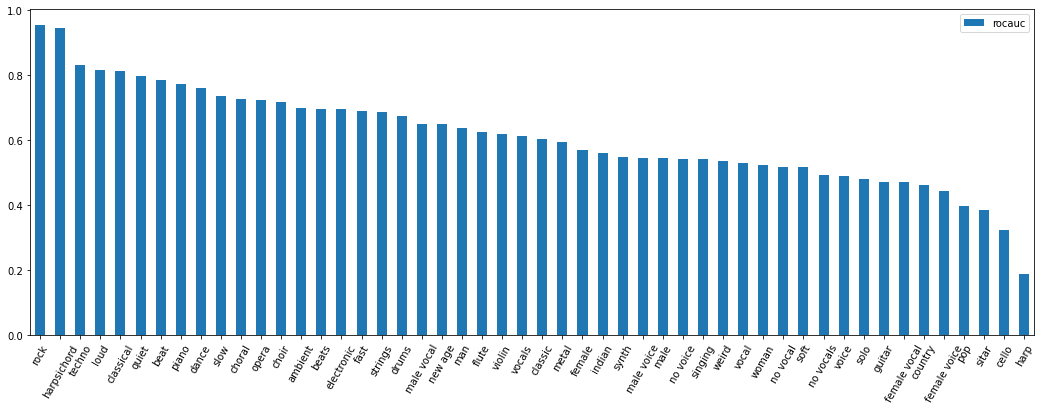

In [58]:
result_auc = pd.DataFrame([tag_wise_rocaucs[tag] for tag in TAGS], columns=['rocauc'], index=TAGS)
result_auc.sort_values(by='rocauc', ascending=False).plot.bar(figsize=(18,6),rot=60) # which tag is easy and hard task

In [59]:
def auto_tagging(waveform, model, input_length, tags, topk):
  """
  Args:
    waveform(np.array) : no channel audio (waveform, )
    model (nn.Module): pytorch model
    input_length (int): sample_rate x duration (second) 
    tags (list): list of tags
    topk (int): tagging number
  """
  device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
  model = model.to(device)
  chunk_number = waveform.shape[0] // input_length
  chunk = np.zeros((chunk_number, input_length))
  for idx in range(chunk.shape[0]):
    chunk[idx] = waveform[idx:idx+input_length]  
  audio_tensor = torch.from_numpy(chunk.astype(np.float32))
  predictions = model(audio_tensor.unsqueeze(1).to(device))
  logit = predictions.mean(dim=0, keepdim=False).detach().cpu().numpy()
  annotation = [tags[i] for i in logit.argsort()[::-1][:topk]]
  return annotation

In [60]:
# sample infernece id = 234
id = 224
audio_sample = df_test.loc[id]
waveform = np.load(os.path.join("./waveform",id_to_path[id].replace(".mp3",".npy")))
print("annotation tag: ",list(audio_sample[audio_sample != 0].index))
ipd.Audio(waveform, rate=16000) # load a NumPy array

annotation tag:  ['guitar', 'drums', 'rock', 'loud']


In [62]:
annotation = auto_tagging(waveform, runner.model, input_length, TAGS, 2)
print("model predict tags: ",annotation)

model predict tags:  ['guitar', 'techno']


### [Question 1] Implement the given architecture.
Implement a 2D CNN with the architecture below, train, and report a test accuracy of the 2D CNN.

| Layer          | Output Size | Details                 |
|----------------|-------------|-------------------------|
| input          | B x 1 x sample_rate * duration,    | batch x channel (mono) x samples |
| mel_spec       | B x 1 x 96 x 188    | batch x channel (mono) x freq x time|
| conv + maxpool | B x 64 x 24 x 47    | output_channels=64, kernel_size=3, pooling=(4,4) |
| conv + maxpool | B x 128 x 8 x 15    | output_channels=128, kernel_size=3, pooling=(3,3) |
| conv + maxpool | B x 128 x  2 x 5     | output_channels=128, kernel_size=3 pooling=(3,3) |
| conv + maxpool | B x 64 x 1 x 1      | output_channels=64, kernel_size=3 pooling=(2,5)                    |
| classifier     | B x 50         | -                       |


Note: you should give appropriate paddings! 

In [36]:
import torch.nn as nn

class Conv_2d(nn.Module):
  def __init__(self, input_channels, output_channels, kernel_size=3, stride=1, padding=1, pooling=2):
    # To do
    #========================================
    """
    Args:
      input_channels, 
      output_channels, 
      kernel_size, 
      stride, 
      padding, 
      pooling
    """
    super(Conv_2d, self).__init__()
    self.conv = None
    self.bn = None
    self.relu = None
    self.mp = None
    #========================================
  def forward(self, x):
    out = self.mp(self.relu(self.bn(self.conv(x))))
    return out

class CNN2D(nn.Module):
  def __init__(self,
              sample_rate=16000,
              n_fft=512,
              f_min=0.0,
              f_max=8000.0,
              n_mels=96,
              n_class=50):
    super(CNN2D, self).__init__()
    
    # Spectrogram
    self.spec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                      n_fft=n_fft,
                                                      f_min=f_min,
                                                      f_max=f_max,
                                                      n_mels=n_mels)
    self.to_db = torchaudio.transforms.AmplitudeToDB()
    self.spec_bn = nn.BatchNorm2d(1)
    # To do
    #========================================
    self.layer1 = None
    self.layer2 = None
    self.layer3 = None
    self.layer4 = None
    #========================================
    self.linear = nn.Linear(64, n_class)
  def forward(self, x):
    x = self.spec(x)
    x = self.to_db(x)
    x = self.spec_bn(x)
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    x = x.view(x.size(0), -1)
    x = self.linear(x)
    x = nn.Sigmoid()(x) # for binary cross entropy loss
    return x

### [Question 2] Improve the performenace.
Now it is your turn. You should improve the baseline code with your own algorithm. There are many ways to improve it. The followings are possible ideas: 

* You can try 1D CNN or 2D CNN models and choose different model parameters:
    * Filter size
    * Pooling size
    * Stride size 
    * Number of filters
    * Model depth
    * Regularization: L2/L1 and Dropout

* You should try different hyperparameters to train the model and optimizers:
    * Learning rate
    * Model depth
    * Optimizers: SGD (with Nesterov momentum), Adam, RMSProp, ...

* You can try training a model using both mel-spectrograms and features extracted using the pre-trained models. However, end-to-end training using additional external data is prohibited. (Performance doesn't have a huge impact on grading. don't waste time)


* You can try different parameters (e.g. hop and window size) to extract mel-spectrogram or different features as input to the network (e.g. MFCC, chroma features ...). 

* You can also use ResNet or other CNNs with skip connections. 

* Furthermore, you can augment data using digital audio effects.

# Metric Learning

Metric learning is a paradigm of representation learning, in which proximity between the representations of items is optimized to correspond to a notion of similarity. 

Compared to the classification, metric learning can leverage more flexible forms of supervision, for example, two audio clips belong to the same artist or not, or have the same tempo or not. Search and recommender systems rely on similarity between songs, artists, albums, lyrics, tags, etc. Nearest neighbor classifiers use similarity to propagate information (eg, tags) from labeled to unlabeled data.


### Dataloader

In [71]:
import random
class TripletDataset(Dataset):
  def __init__(self, paths, id_to_path, input_length, binary, tags, split):
    """
    Args:
      paths (str): path to load dataset from
      id_to_path (Dict): track id to audio path
      input_length (int): sample_rate x duration (second) 
      binary (Pandas.DataFrame): binary matrix for audio (index: track_id, columns: tag binary)
      tags(list) : list of tag
      split (str): one of [TRAIN, VALID, TEST]
    """
    self.paths = paths
    self.id_to_path = id_to_path
    self.input_length = input_length
    self.tags = tags
    self.binary = binary
    self.split = split

  def __getitem__(self, index):
    if self.split in ["TRAIN","VALID"]:
      tag = random.choice(self.tags)
      tag_binary = self.binary[tag]
      positive_tracks = tag_binary[tag_binary != 0]
      negative_tracks = tag_binary[tag_binary == 0]
      anc_id, pos_id = positive_tracks.sample(2).index
      neg_id = negative_tracks.sample(1).index[0]

      anc_waveform = self.item_to_waveform(anc_id)
      pos_waveform = self.item_to_waveform(pos_id)
      neg_waveform = self.item_to_waveform(neg_id)
      return anc_waveform, pos_waveform, neg_waveform

    elif self.split == "TEST":
      item = self.binary.iloc[index]
      id = item.name
      path = os.path.join(self.paths, self.id_to_path[id].replace(".mp3",".npy"))
      waveform = np.load(path)
      chunk_number = waveform.shape[0] // self.input_length
      chunk = np.zeros((chunk_number, self.input_length))
      for idx in range(chunk.shape[0]):
        chunk[idx] = waveform[idx:idx+input_length]
      audio = chunk.astype(np.float32)
      label = item.values.astype(np.float32)
      return audio, label

  def item_to_waveform(self, id):
    path = os.path.join(self.paths, self.id_to_path[id].replace(".mp3", ".npy")) # pre-extract waveform, for fast loader
    waveform = np.load(path) 
    random_idx = np.random.randint(low=0, high=int(waveform.shape[0] - self.input_length))
    waveform = waveform[random_idx:random_idx+self.input_length] # extract input
    audio = np.expand_dims(waveform, axis = 0)# 1 x samples
    return audio.astype(np.float32)

  def __len__(self):
    if self.split in ["TRAIN","VALID"]:
      return len(self.binary) # it is tag wise sampling, so you can increase dataset length
    elif self.split == "TEST":
      return len(self.binary)

In [72]:
tr_data = TripletDataset(data_path, id_to_path, input_length, df_train, TAGS, "TRAIN")
va_data = TripletDataset(data_path, id_to_path, input_length, df_valid, TAGS, "VALID")
te_data = TripletDataset(data_path, id_to_path, input_length, df_test, TAGS, "TEST")
loader_train = DataLoader(tr_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers, drop_last=True)
loader_valid = DataLoader(va_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, drop_last=False)
loader_test = DataLoader(te_data, batch_size=1, shuffle=False, num_workers=num_workers, drop_last=False)

In [161]:
class LinearProjection(nn.Module):
  """
  Backbone model for linear proejction
  mel spectrogam to embedding
  """
  def __init__(self,
              sample_rate=16000,
              n_fft=512,
              f_min=0.0,
              f_max=8000.0,
              n_mels=96):
    """
    Args:
      sample_rate (int): path to load dataset from
      n_fft (int): number of samples for fft
      f_min (float): min freq
      f_max (float): max freq
      n_mels (float): number of mel bin
      n_class (int): number of class
    """
    super(LinearProjection, self).__init__()
    self.spec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                      n_fft=n_fft,
                                                      f_min=f_min,
                                                      f_max=f_max,
                                                      n_mels=n_mels)
    self.to_db = torchaudio.transforms.AmplitudeToDB()
    self.spec_bn = nn.BatchNorm2d(1)
    self.embedding_size = 4096
    self.linear_proj = nn.Linear(n_mels * 188, self.embedding_size) # (freq * time) to embedding dim
  def forward(self, x):
    x = self.spec(x)
    x = self.to_db(x)
    x = self.spec_bn(x)
    x = x.squeeze(1)
    x = x.view(x.size(0), -1)
    embedding = self.linear_proj(x)
    return embedding

In [162]:
class TripletLoss(nn.Module):
  def __init__(self, margin):
    """
    Args:
      margin:
    """
    super(TripletLoss, self).__init__()
    self.margin = margin
    self.relu = nn.ReLU()
    
  def forward(self, anchor, positive, negative):
    pos_sim = nn.CosineSimilarity(dim=-1)(anchor, positive)
    neg_sim = nn.CosineSimilarity(dim=-1)(anchor, negative)
    losses = self.relu(self.margin - pos_sim + neg_sim)
    return losses.mean()

### [Question 3] Implement the evaluation metric.
Implement a multi-label recall for metric learning. 
- https://arxiv.org/abs/2008.03729

If one of the top K retrieved results has the same class label as the query song, the recall@K is set to 1, otherwise it is set to 0. This process is repeated for all samples in the test set and then averaged. Our data is multi-labeled, however, so we adapt the standard single-label (multi-class) R@K metric to create a multi-label variant. Our definition is

$$
Recall@K = \frac{1}{N} \Sigma^{N}_{q=1} 
\frac{n(y^{q} \cap (\cup^{K}_{i=1}y^{i})}{n(y^{q})}
$$

where $N$ is the number of test samples, $y^{q}$ is the ground truth labels of a query, and $y^{i}$ is the ground truth labels of the top $K$ retrieved results. And, $n(·)$ denotes the number of the elements of a set. In this setup, if the set of labels of the top K retrieved results contains all the multiple labels of the query song, the recall@K is set to 1, otherwise it is set to the correct answer ratio. We report R@K when K is 1, 2, 4, and 8.

In [163]:
class Metric_Runner(object):
  def __init__(self, model, lr, momentum, weight_decay, sr):
    """
    Args:
      model (nn.Module): pytorch model
      lr (float): learning rate
      momentum (float): momentum
      weight_decay (float): weight_decay
      sr (float): stopping rate
    """
    self.optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=True, weight_decay=weight_decay)
    self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=0.2, patience=5, verbose=True)
    self.learning_rate = lr
    self.stopping_rate = sr
    self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    self.model = model.to(self.device)
    self.criterion = TripletLoss(margin=0.4).to(self.device)

  # Running model for train, test and validation. mode: 'train' for training, 'eval' for validation and test
  def run(self, dataloader, epoch, mode='TRAIN'):
    self.model.train() if mode is 'TRAIN' else self.model.eval()

    epoch_loss = 0
    pbar = tqdm(dataloader, desc=f'{mode} Epoch {epoch:02}')  # progress bar
    for item in pbar:
      # Move mini-batch to the desired device.
      anc, pos, neg = item
      anc_emb = self.model(anc.to(self.device))
      pos_emb = self.model(pos.to(self.device))
      neg_emb = self.model(neg.to(self.device))
      
      # Compute the loss.
      loss = self.criterion(anc_emb, pos_emb, neg_emb)
      if mode is 'TRAIN':
        # Perform backward propagation to compute gradients.
        loss.backward()
        # Update the parameters.
        self.optimizer.step()
        # Reset the computed gradients.
        self.optimizer.zero_grad()

      batch_size = anc_emb.shape[0]
      epoch_loss += batch_size * loss.item()
    epoch_loss = epoch_loss / len(dataloader.dataset)
    return epoch_loss

  def test(self, dataloader):
    self.model.eval()
    epoch_loss = 0
    embeddings, labels = [], []
    pbar = tqdm(dataloader, desc=f'TEST')  # progress bar
    for waveform, label in pbar:
      waveform = waveform.transpose(1,0)
      with torch.no_grad():
        embedding = self.model(waveform.to(self.device))
      embeddings.append(embedding.mean(0,True).detach().cpu())
      labels.append(label)
    embeddings = torch.stack(embeddings).squeeze(1)
    labels = torch.stack(labels).squeeze(1)

    # calculate cosine similarity (if you use different distance metric, than you need to change this part)
    embedding_norm = embeddings / embeddings.norm(dim=-1, keepdim=True)
    sim_matrix = embedding_norm @ embedding_norm.T
    sim_matrix = sim_matrix.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    multilabel_recall = {
        "R@1" : self.multilabel_recall(sim_matrix, labels, top_k=1),
        "R@2" : self.multilabel_recall(sim_matrix, labels, top_k=2),
        "R@4" : self.multilabel_recall(sim_matrix, labels, top_k=4),
        "R@8" : self.multilabel_recall(sim_matrix, labels, top_k=8),
    }
    return multilabel_recall

  def multilabel_recall(self, sim_matrix, binary_labels, top_k):
    # =======================
    ## To-do
    return None
    # =======================

  # Early stopping function for given validation loss
  def early_stop(self, loss, epoch):
    self.scheduler.step(loss, epoch)
    self.learning_rate = self.optimizer.param_groups[0]['lr']
    stop = self.learning_rate < self.stopping_rate
    return stop

In [164]:
NUM_EPOCHS = 3
model = LinearProjection()
runner = Metric_Runner(model=model, lr = LR, momentum = MOMENTUM, weight_decay = WEIGHT_DECAY, sr = SR)
for epoch in range(NUM_EPOCHS):
  train_loss = runner.run(loader_train, epoch, 'TRAIN')
  valid_loss = runner.run(loader_valid, epoch, 'VALID')
  print("[Epoch %d/%d] [Train Loss: %.4f] [Valid Loss: %.4f]" %
        (epoch + 1, NUM_EPOCHS, train_loss, valid_loss))
  if runner.early_stop(valid_loss, epoch + 1):
    break

TRAIN Epoch 00:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 00:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 1/3] [Train Loss: 0.3162] [Valid Loss: 0.3019]


TRAIN Epoch 01:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 01:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 2/3] [Train Loss: 0.3017] [Valid Loss: 0.3000]


TRAIN Epoch 02:   0%|          | 0/387 [00:00<?, ?it/s]

VALID Epoch 02:   0%|          | 0/96 [00:00<?, ?it/s]

[Epoch 3/3] [Train Loss: 0.3027] [Valid Loss: 0.2956]


In [165]:
# multilabel_recall = runner.test(loader_test)

In [166]:
# multilabel_recall

### [Question 4] Improve the performenace.
Now it is your turn. You should improve the baseline code with your own algorithm. There are many ways to improve it. The followings are possible ideas: 

* Change backbone model
  - https://arxiv.org/abs/1609.04243
  - https://arxiv.org/abs/1711.02520
  - https://arxiv.org/abs/2006.00751
* Change distance mesure
  - Euclidean distance
  - Cosine distance
* Change positive negative sampling
  - Tag based sampling
  - Timbre, Beat based sampling
  - Latent Space based sampling (SVD or Word Embedding)
  - Instance based sampling

In [167]:
# TODO: Question 4


# Deliverables
You should submit your Python code (`.ipynb` or `.py` files) and homework report (.pdf file) to KLMS. The report should include:
* Algorithm Description
* Experiments and Results
* Discussion

# Note
The code is written using PyTorch but you can use TensorFlow if you want.

# Credit
Thie homework was implemented by Jongpil Lee, Soonbeom Choi, Taejun Kim and SeungHeon Doh in the KAIST Music and Audio Computing Lab.
